In [162]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None,'display.max_columns', None)
from pandas import Series, DataFrame

## Data Read

In [88]:
df = pd.read_csv('input/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240326.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [90]:
df = df[['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 
                       'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location']]

In [91]:
df.dtypes

PdId               int64
IncidntNum         int64
Incident Code      int64
Category          object
Descript          object
DayOfWeek         object
Date              object
Time              object
PdDistrict        object
Resolution        object
Address           object
X                float64
Y                float64
location          object
dtype: object

In [92]:
df.isnull().sum()

PdId             0
IncidntNum       0
Incident Code    0
Category         0
Descript         0
DayOfWeek        0
Date             0
Time             0
PdDistrict       1
Resolution       0
Address          0
X                0
Y                0
location         0
dtype: int64

In [93]:
df.index[df.isnull().any(axis=1)]

Index([1342594], dtype='int64')

In [94]:
df.drop([1342594], axis=0, inplace=True)

In [95]:
df.shape

(2129524, 14)

## EDA using multiple features

In [96]:
df.sample(5)

PdId  IncidntNum  Incident Code        Category  \
425590    7112603126170    71126031          26170  OTHER OFFENSES   
1292587  17004648764070   170046487          64070  SUSPICIOUS OCC   
415182   13607875106244   136078751           6244   LARCENY/THEFT   
1335146  16102390371000   161023903          71000    NON-CRIMINAL   
1552962  14609704206244   146097042           6244   LARCENY/THEFT   

                             Descript DayOfWeek        Date   Time  \
425590            PROBATION VIOLATION    Friday  11/02/2007  18:09   
1292587         SUSPICIOUS OCCURRENCE   Tuesday  01/17/2017  17:45   
415182   GRAND THEFT FROM LOCKED AUTO   Tuesday  05/07/2013  22:15   
1335146                 LOST PROPERTY  Thursday  12/15/2016  15:00   
1552962  GRAND THEFT FROM LOCKED AUTO    Friday  05/23/2014  19:00   

         PdDistrict      Resolution                   Address           X  \
425590   TENDERLOIN  ARREST, BOOKED      0 Block of TAYLOR ST -122.410804   
1292587     MISSION            NONE      MISSION ST / 16TH ST -122.419672   
415182     NORTHERN            NONE     CEDAR ST / VANNESS AV -122.421477   
1335146    SOUTHERN            NONE        BRYANT ST / 7TH ST -122.404749   
1552962    RICHMOND            NONE  2900 Block of PACIFIC AV -122.443835   

                 Y                                        location  
425590   37.783063    POINT (-122.41080440849198 37.7830629612396)  
1292587  37.765050   POINT (-122.41967178029562 37.76505012146682)  
415182   37.786153      POINT (-122.421477162118 37.7861527352201)  
1335146  37.774280  POINT (-122.40474927353259 37.774280097745425)  
1552962  37.792137      POINT (-122.443835267233 37.7921365604231)

## Incident Number

In [97]:
df.IncidntNum.describe()

count    2.129524e+06
mean     1.042410e+08
std      4.617921e+07
min      3.979000e+03
25%      6.125908e+07
50%      1.011933e+08
75%      1.409596e+08
max      9.915824e+08
Name: IncidntNum, dtype: float64

In [98]:
len(df.IncidntNum.unique())

1703625

In [99]:
df.Category.describe()

count           2129524
unique               37
top       LARCENY/THEFT
freq             477974
Name: Category, dtype: object

<Axes: xlabel='Category'>

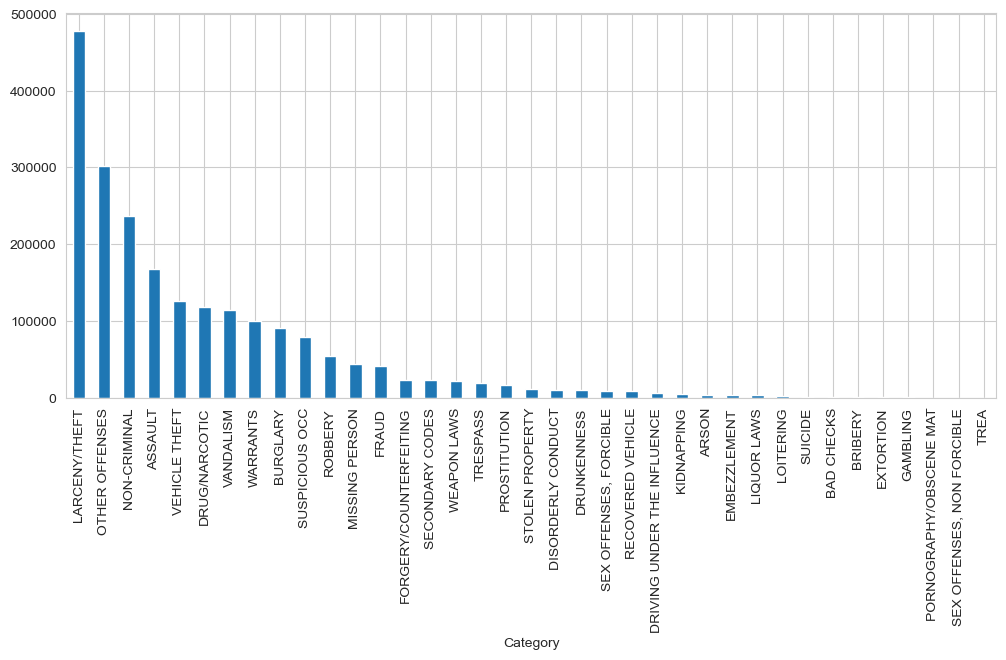

In [100]:
df.Category.value_counts().plot(kind="bar", figsize=(12,5))

In [101]:
df.Category.value_counts(normalize=True)

Category
LARCENY/THEFT                  0.224451
OTHER OFFENSES                 0.141757
NON-CRIMINAL                   0.111259
ASSAULT                        0.078441
VEHICLE THEFT                  0.059275
DRUG/NARCOTIC                  0.055327
VANDALISM                      0.053870
WARRANTS                       0.046875
BURGLARY                       0.042764
SUSPICIOUS OCC                 0.037138
ROBBERY                        0.025577
MISSING PERSON                 0.020788
FRAUD                          0.019417
FORGERY/COUNTERFEITING         0.010798
SECONDARY CODES                0.010508
WEAPON LAWS                    0.009863
TRESPASS                       0.009013
PROSTITUTION                   0.007749
STOLEN PROPERTY                0.005377
DISORDERLY CONDUCT             0.004664
DRUNKENNESS                    0.004583
SEX OFFENSES, FORCIBLE         0.004107
RECOVERED VEHICLE              0.004080
DRIVING UNDER THE INFLUENCE    0.002654
KIDNAPPING                     

In [102]:
df.Descript.describe()

count                          2129524
unique                             847
top       GRAND THEFT FROM LOCKED AUTO
freq                            178775
Name: Descript, dtype: object

In [103]:
df[['Category','Descript']].sample(5)

Category                           Descript
875608    LARCENY/THEFT       GRAND THEFT FROM LOCKED AUTO
206729         WARRANTS                     WARRANT ARREST
1926252        WARRANTS                     WARRANT ARREST
280721   OTHER OFFENSES  OBSTRUCTIONS ON STREETS/SIDEWALKS
117086          ASSAULT                            BATTERY

## Day of Week

In [104]:
df.DayOfWeek.describe()

count     2129524
unique          7
top        Friday
freq       324151
Name: DayOfWeek, dtype: object

In [105]:
df.DayOfWeek.value_counts()

DayOfWeek
Friday       324151
Wednesday    311601
Saturday     308907
Thursday     303893
Tuesday      302455
Monday       294530
Sunday       283987
Name: count, dtype: int64

Text(0.5, 1.0, 'Day of week')

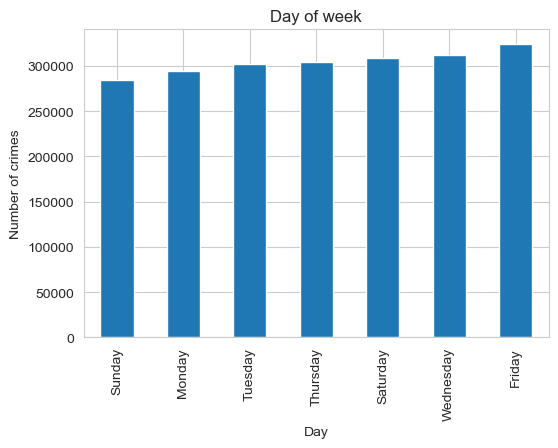

In [106]:
plt.figure(figsize=(6,4))
df['DayOfWeek'].value_counts().sort_values().plot.bar()
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.title('Day of week')

## Date

In [107]:
df.Date.describe()

count        2129524
unique          5613
top       01/01/2011
freq             627
Name: Date, dtype: object

In [108]:
df.Date.sample()

215406    07/20/2003
Name: Date, dtype: object

In [109]:
from datetime import datetime

In [110]:
df.Date =  pd.to_datetime(df.Date, infer_datetime_format=True)

/var/folders/15/sz9sykc94dbgsj57ltpdvw4m0000gn/T/ipykernel_87120/4270209707.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.Date =  pd.to_datetime(df.Date, infer_datetime_format=True)


In [111]:
df.Date.sample()

2034460   2017-07-19
Name: Date, dtype: datetime64[ns]

In [112]:
# create a scalar "length" to describe the length of time [in years] since the date of the incident to today. 
dttoday = datetime.now().strftime('%Y-%m-%d')
df['length'] = df.Date.apply(lambda x:(np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

In [113]:
df['Year'] = df.Date.map(lambda x: int(x.strftime('%Y-%m-%d').split('-')[0]))
df['Month'] = df.Date.map(lambda x: int(x.strftime('%Y-%m-%d').split('-')[1]))
df['Day'] = df.Date.map(lambda x: int(x.strftime('%Y-%m-%d').split('-')[2]))

In [114]:
df.Year.value_counts().sort_values()

Year
2018     45059
2011    126713
2010    127758
2007    131771
2006    131856
2009    134309
2008    135242
2012    135464
2005    137048
2004    142054
2003    142803
2014    144844
2016    145993
2013    147664
2017    149487
2015    151459
Name: count, dtype: int64

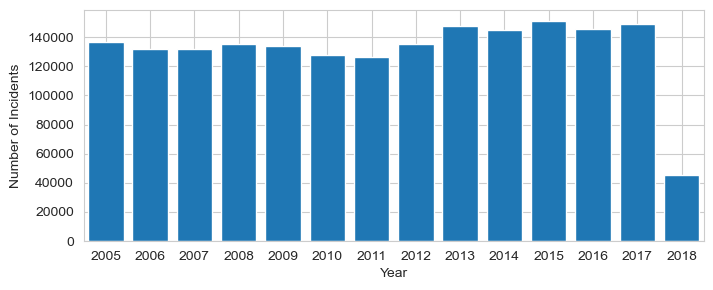

In [115]:
# visulize in a bar plot
fig = plt.figure(figsize=[8, 3])
plt.bar(sorted(df.Year.value_counts().index), df.Year.value_counts().values[np.argsort(df.Year.value_counts().index)])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xlim((2004.5,2018.5))
#plt.ylim((150000,200000))
plt.xticks(np.arange(2005,2019) )
plt.show()

In [116]:
df.Month.value_counts().sort_values()

Month
12    164521
11    168193
6     168232
2     171125
7     175525
9     176413
5     179939
8     181183
4     182248
10    183034
3     189389
1     189722
Name: count, dtype: int64

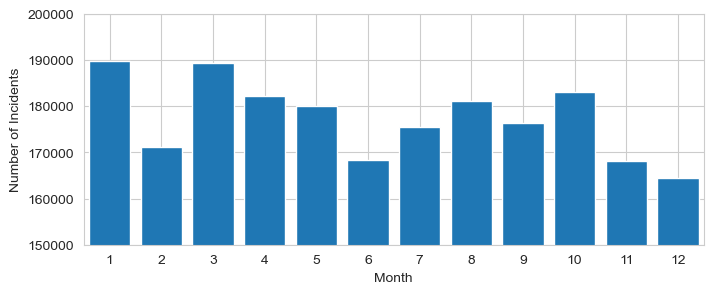

In [117]:
# visulize in a bar plot
fig = plt.figure(figsize=[8, 3])
plt.bar(sorted(df.Month.value_counts().index), df.Month.value_counts().values[np.argsort(df.Month.value_counts().index)])
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xlim((0.5,12.5))
plt.ylim((150000,200000))
plt.xticks( np.arange(1,13) )
plt.show()

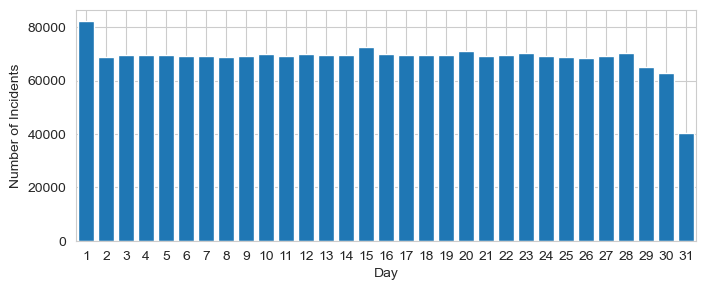

In [118]:
# visulize in a bar plot
fig = plt.figure(figsize=[8,3])
plt.bar(sorted(df.Day.value_counts().index), df.Day.value_counts().values[np.argsort(df.Day.value_counts().index)])
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.xlim((0.5,31.5))
#plt.ylim((150000,200000))
plt.xticks( np.arange(1,32) )
plt.show()

## Time

In [119]:
df.Time.describe()

count     2129524
unique       1439
top         12:00
freq        55297
Name: Time, dtype: object

In [120]:
df.Time.value_counts().nlargest(5)

Time
12:00    55297
00:01    54243
18:00    47081
17:00    40887
19:00    40637
Name: count, dtype: int64

In [121]:
df.Time.value_counts().nsmallest(5)

Time
05:31    100
05:32    102
05:23    107
05:38    109
06:01    109
Name: count, dtype: int64

In [122]:
df['Time_float'] = df.Time.map(lambda x: int(x.split(':')[0]) + float(x.split(':')[1])/60)

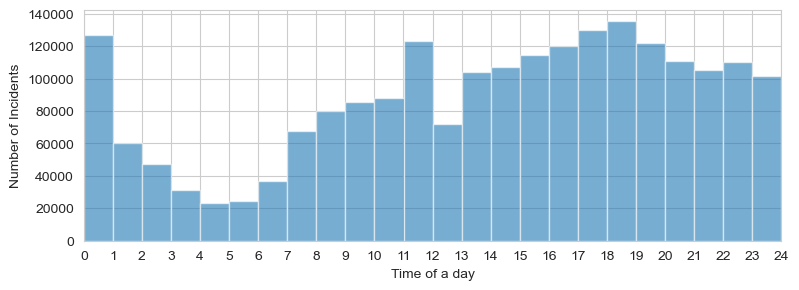

In [123]:
# visulize in a histogram plot
fig = plt.figure(figsize=[9,3])
plt.hist(df['Time_float'], bins=24, alpha = 0.6)
plt.xlabel('Time of a day')
plt.ylabel('Number of Incidents')
plt.xlim((0.0, 24))
plt.xticks( np.arange(0,25) )
plt.show()

In [124]:
# at Noon
df['Category'].loc[(df.Time_float > 11.5) & (df.Time_float < 12.5)].value_counts().nlargest(5)

Category
LARCENY/THEFT     22651
OTHER OFFENSES    18078
NON-CRIMINAL      15863
ASSAULT            7818
DRUG/NARCOTIC      5467
Name: count, dtype: int64

In [125]:
# at Midnight
df['Category'].loc[(df.Time_float > 23) | (df.Time_float < 1.5)].value_counts().nlargest(5)

Category
LARCENY/THEFT     38627
OTHER OFFENSES    36589
NON-CRIMINAL      20173
ASSAULT           19232
VANDALISM         13155
Name: count, dtype: int64

In [126]:
# overall
df['Category'].value_counts().nlargest(5)

Category
LARCENY/THEFT     477974
OTHER OFFENSES    301874
NON-CRIMINAL      236928
ASSAULT           167042
VEHICLE THEFT     126228
Name: count, dtype: int64

In [127]:
# number of incidents at day/night
print('number of incidents before 12pm:', df.loc[(df.Time_float < 12)].shape[0])
print('number of incidents after 12pm:', df.loc[(df.Time_float >= 12)].shape[0])

number of incidents before 12pm: 740015
number of incidents after 12pm: 1389509


## pdDistrict

In [128]:
df.PdDistrict.describe()

count      2129524
unique          10
top       SOUTHERN
freq        390692
Name: PdDistrict, dtype: object

/var/folders/15/sz9sykc94dbgsj57ltpdvw4m0000gn/T/ipykernel_87120/1852322814.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_idx = sorted(range(len(counts_pd)), key=lambda i: counts_pd[i])[-10:]
/var/folders/15/sz9sykc94dbgsj57ltpdvw4m0000gn/T/ipykernel_87120/1852322814.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(pos, counts_pd[sorted_idx], align='center', color='#7A68A6')


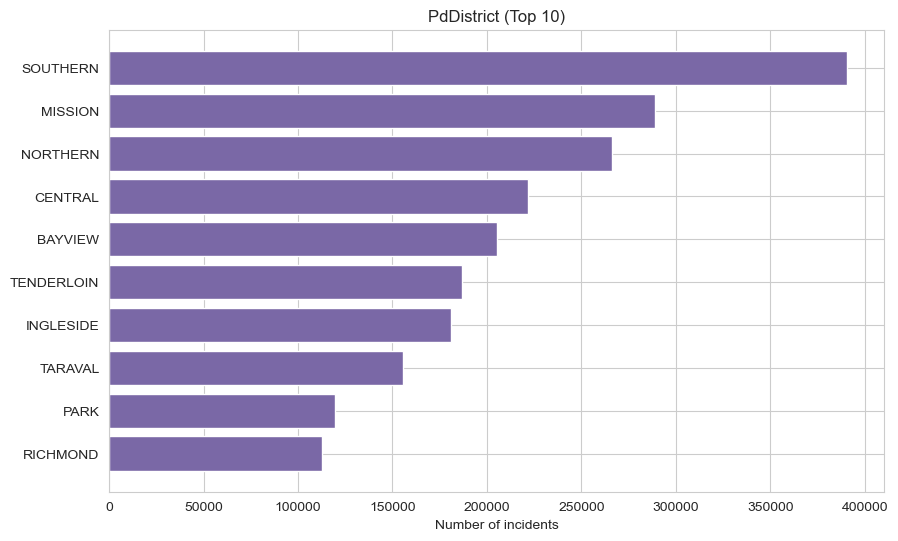

In [133]:
# Normalize and visualize the top 10 PdDistrict
counts_pd = df.PdDistrict.value_counts()
sorted_idx = sorted(range(len(counts_pd)), key=lambda i: counts_pd[i])[-10:]
pos = np.arange(len(sorted_idx)) + .5
names = df.PdDistrict.value_counts().nlargest(10).index.tolist()

plt.figure(figsize=(10, 6))

plt.barh(pos, counts_pd[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(names)[sorted_idx])
plt.xlabel('Number of incidents')
plt.title('PdDistrict (Top 10)')
plt.show()


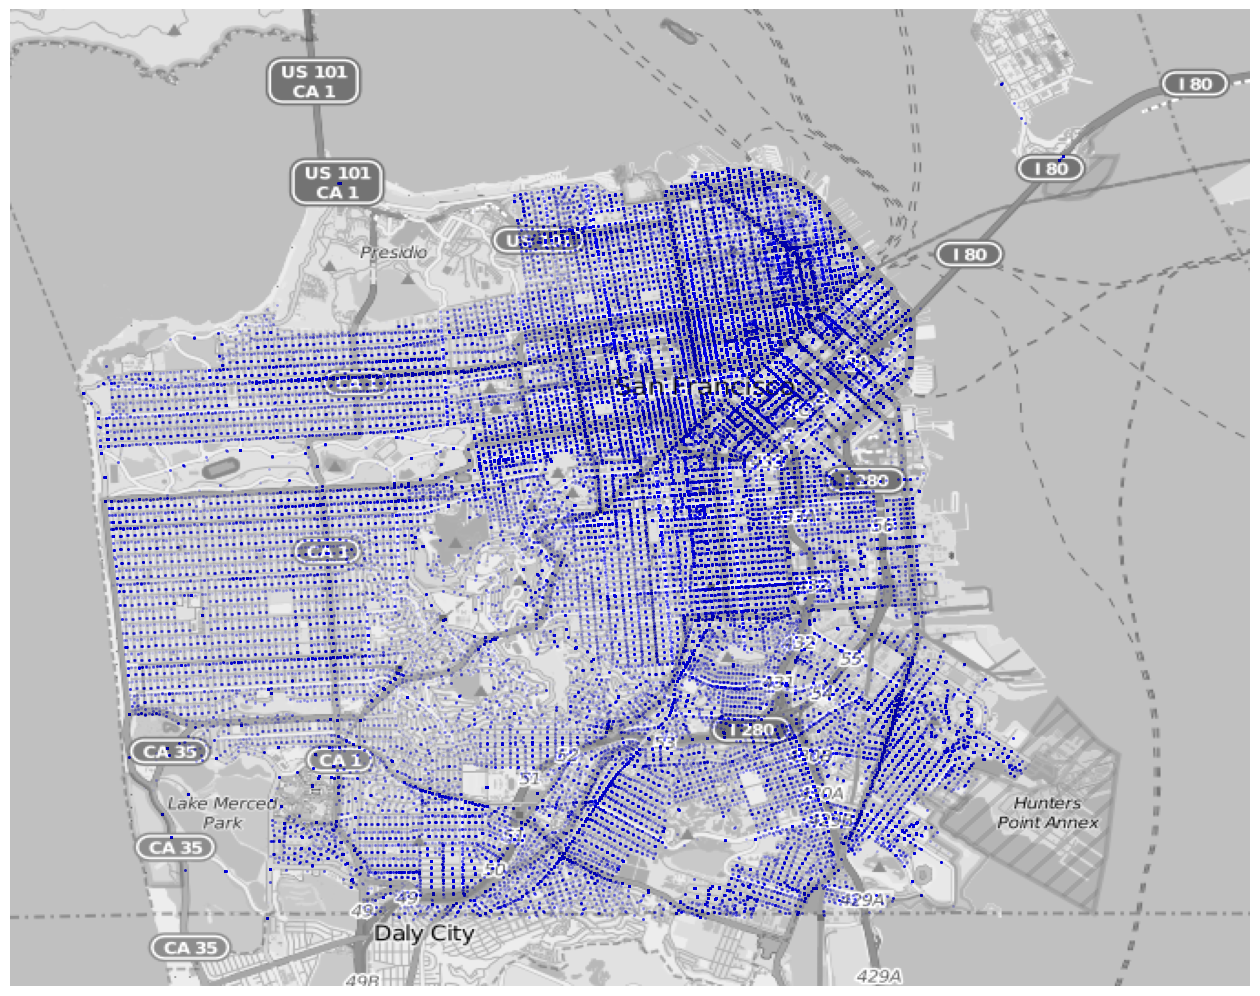

In [134]:
# Load the map
SF_map = np.loadtxt("input/sf_map_copyright_openstreetmap_contributors.txt")

# Supplied map bounding box:
# ll.lon     ll.lat   ur.lon     ur.lat
# -122.52469 37.69862 -122.33663 37.82986
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
asp = SF_map.shape[0] * 1.0 / SF_map.shape[1]

# Create the plot
fig = plt.figure(figsize=(16, 16))
plt.imshow(SF_map, cmap='gray', extent=lon_lat_box, aspect=1/asp)
ax = plt.gca()

# Filter out entries with erratic position coordinates
filtered_df = df[(df['Y'] >= 37.699) & (df['Y'] <= 37.8299) & (df['X'] >= -122.5247) & (df['X'] <= -122.3366)]

# Plot crime occurrences
ax.scatter(x=filtered_df['X'], y=filtered_df['Y'], marker='o', s=2, color='blue', alpha=0.01)

ax.set_axis_off()

plt.show()

<Axes: title={'center': 'Disbribution of the City-wide Ten Most Common Crimes in Each District'}, ylabel='PdDistrict'>

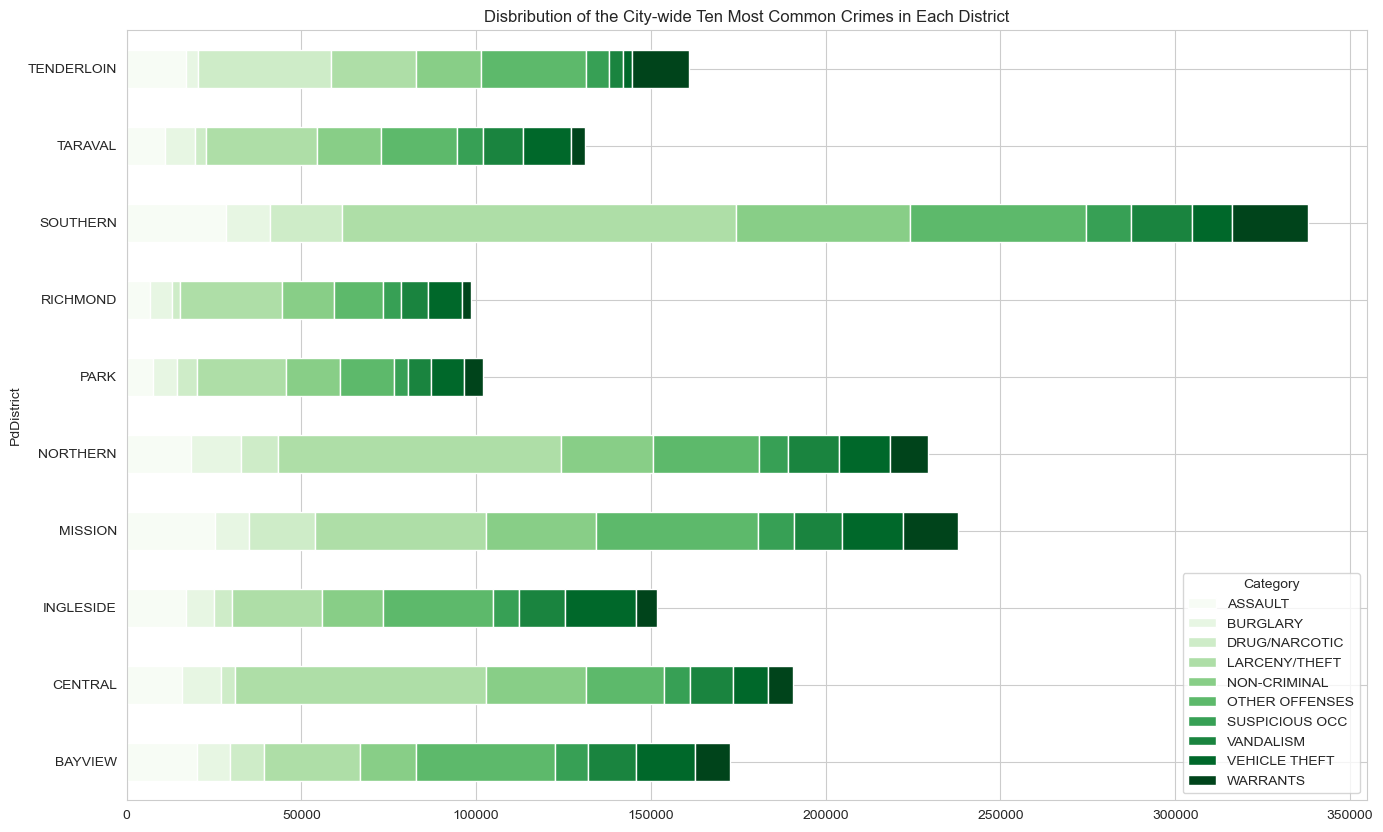

In [136]:
ten_most_common=df[df['Category'].isin(df['Category'].value_counts().head(10).index)]

ten_most_crime_by_district=pd.crosstab(ten_most_common['PdDistrict'],ten_most_common['Category'])
ten_most_crime_by_district.plot(kind='barh',figsize=(16,10),stacked=True,colormap='Greens',title='Disbribution of the City-wide Ten Most Common Crimes in Each District')
#plt.savefig('Disbribution_of_the_City-wide_Ten_Most_Common_Crimes_in_Each_District.png')


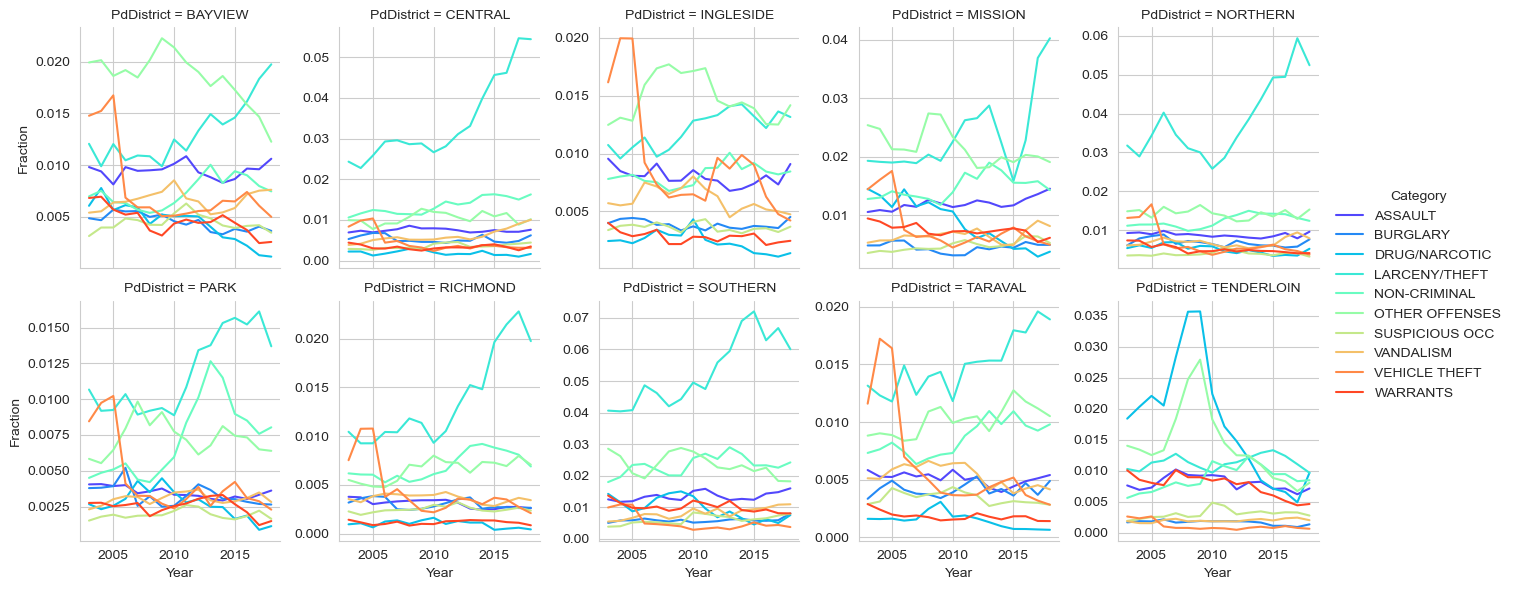

In [138]:
freq_by_d_c=pd.pivot_table(df[['PdDistrict','Category','Year','Day']], values='Day',columns=('Year'),index=('PdDistrict','Category'),aggfunc='count')
freq_by_d_c=freq_by_d_c.fillna(0).apply(lambda x: x/np.sum(x))
freq_by_d_c=freq_by_d_c.stack()
freq_by_d_c=freq_by_d_c.reset_index()
freq_by_d_c=freq_by_d_c.rename(columns={0:'Fraction'})
most_common=freq_by_d_c[freq_by_d_c['Category'].isin(df['Category'].value_counts().head(10).index)]

by_hour_for_months=sns.FacetGrid(most_common, hue='Category', col='PdDistrict', col_wrap=5, sharex=True, sharey=False, aspect=0.9, palette='rainbow')
by_hour_for_months=by_hour_for_months.map(plt.plot,'Year','Fraction').add_legend()
plt.savefig('Crime_Trend_in_Each_District.png')

## Resolution

In [139]:
df.Resolution.sample(5)

1576854    ARREST, BOOKED
670294               NONE
1505515              NONE
1840087              NONE
1658088              NONE
Name: Resolution, dtype: object

In [140]:
df.Resolution.value_counts(normalize=True)

Resolution
NONE                                      0.639935
ARREST, BOOKED                            0.239073
ARREST, CITED                             0.072018
PSYCHOPATHIC CASE                         0.013646
UNFOUNDED                                 0.010697
LOCATED                                   0.009958
COMPLAINANT REFUSES TO PROSECUTE          0.003561
NOT PROSECUTED                            0.003548
DISTRICT ATTORNEY REFUSES TO PROSECUTE    0.003344
PROSECUTED BY OUTSIDE AGENCY              0.002315
EXCEPTIONAL CLEARANCE                     0.001867
PROSECUTED FOR LESSER OFFENSE             0.000039
Name: proportion, dtype: float64

## Address

In [141]:
df.Address.value_counts().nlargest(5)

Address
800 Block of BRYANT ST      63115
800 Block of MARKET ST      16664
2000 Block of MISSION ST    10686
1000 Block of POTRERO AV     9720
900 Block of MARKET ST       7596
Name: count, dtype: int64

In [142]:
df.Address.describe()

count                    2129524
unique                     25121
top       800 Block of BRYANT ST
freq                       63115
Name: Address, dtype: object

## PdId

In [145]:
df.PdId.describe()

count    2.129524e+06
mean     1.042410e+13
std      4.617921e+12
min      3.979630e+08
25%      6.125908e+12
50%      1.011933e+13
75%      1.409596e+13
max      9.915824e+13
Name: PdId, dtype: float64

In [146]:
len(df.PdId.unique())

2129524

In [149]:
df.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek       Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday 2004-11-22  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday 2005-10-18  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday 2004-02-15  02:00   SOUTHERN       NONE   
3                  ARSON    Friday 2011-02-18  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday 2010-11-21  17:00   SOUTHERN       NONE   

                  Address           X          Y  \
0   GENEVA AV / SANTOS ST -122.420084  37.708311   
1  TURK ST / STJOSEPHS AV -120.500000  90.000000   
2     BRANNAN ST / 1ST ST -120.500000  90.000000   
3   0 Block of SANJUAN AV -122.436220  37.724377   
4    400 Block of 10TH ST -122.410541  37.770913   

                                       location     length  Year  Month  Day  \
0    POINT (-122.420084075249 37.7083109744362)  19.389041  2004     11   22   
1                POINT (-120.50000000000001 90)  18.484932  2005     10   18   
2                POINT (-120.50000000000001 90)  20.158904  2004      2   15   
3  POINT (-122.43622001281001 37.7243766140428)  13.145205  2011      2   18   
4    POINT (-122.410541166987 37.7709130566165)  13.389041  2010     11   21   

   Time_float  
0   17.833333  
1   20.000000  
2    2.000000  
3    5.450000  
4   17.000000

<Axes: xlabel='PdDistrict', ylabel='Resolution'>

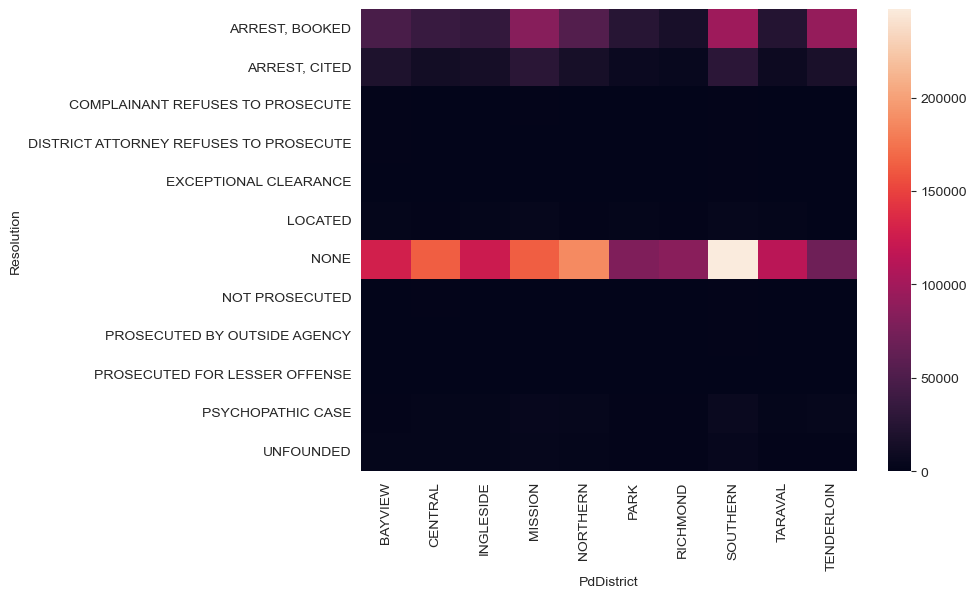

In [147]:
#Cross-tabulate Category and PdDistrict
df_crosstab = pd.crosstab(df.Resolution, df.PdDistrict, margins=True)
del df_crosstab['All']#delete All column
df_crosstab = df_crosstab.iloc[:-1] #delete last row (All)

fig = plt.figure(figsize=(8,6))
sns.heatmap(df_crosstab, cbar=True)


In [150]:
i = df.index[df.Resolution != 'NONE']
i

Index([      9,      12,      13,      14,      16,      18,      22,      24,
            26,      28,
       ...
       2129492, 2129502, 2129510, 2129511, 2129516, 2129517, 2129519, 2129520,
       2129522, 2129523],
      dtype='int64', length=766767)

In [151]:
df['Resolution'].loc[i].sample(5)

8698       ARREST, BOOKED
737245      ARREST, CITED
291461     ARREST, BOOKED
682924     ARREST, BOOKED
1930526         UNFOUNDED
Name: Resolution, dtype: object

<Axes: xlabel='PdDistrict', ylabel='Resolution'>

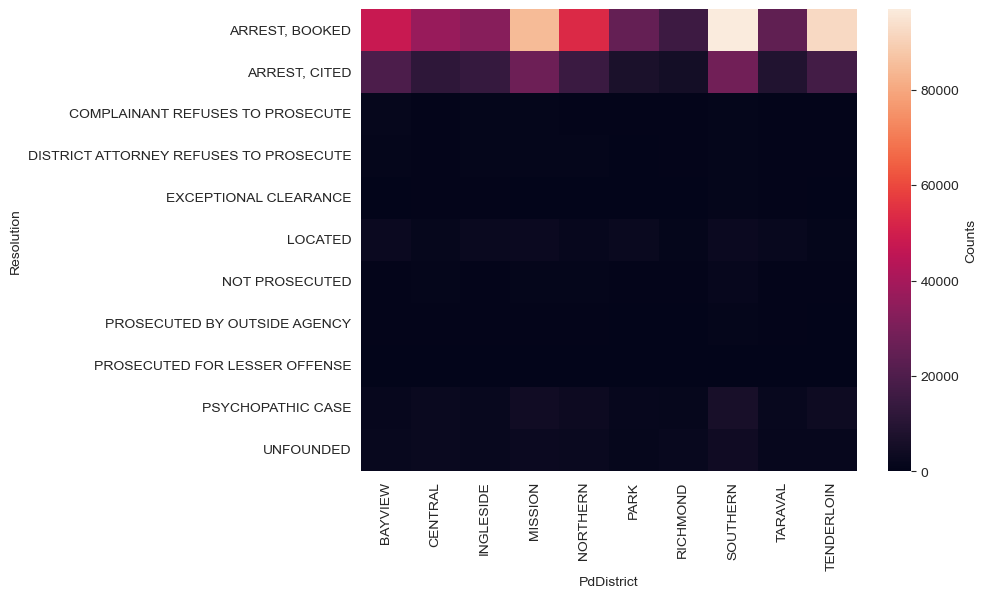

In [152]:
df_crosstab = pd.crosstab(df['Resolution'].loc[i], df['PdDistrict'].loc[i], margins=True)
del df_crosstab['All']#delete All column
df_crosstab = df_crosstab.iloc[:-1] #delete last row (All)

fig = plt.figure(figsize=(8,6))
sns.heatmap(df_crosstab, cbar=True,cbar_kws={'label': 'Counts'})

<Axes: xlabel='DayOfWeek', ylabel='PdDistrict'>

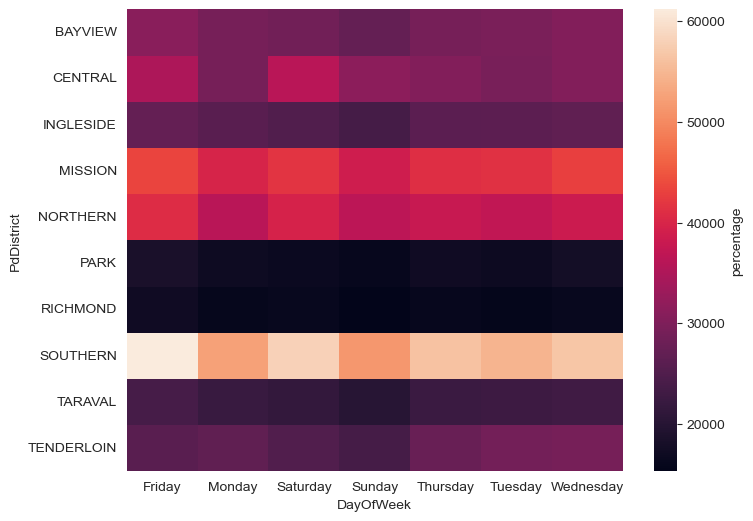

In [153]:
df_crosstab = pd.crosstab(df['PdDistrict'],df['DayOfWeek'],  margins=True)
del df_crosstab['All']#delete All column
df_crosstab = df_crosstab.iloc[:-1] #delete last row (All)

fig = plt.figure(figsize=(8,6))
sns.heatmap(df_crosstab, cbar=True,cbar_kws={'label': 'percentage'})


## Spatial Distribution of Incidents

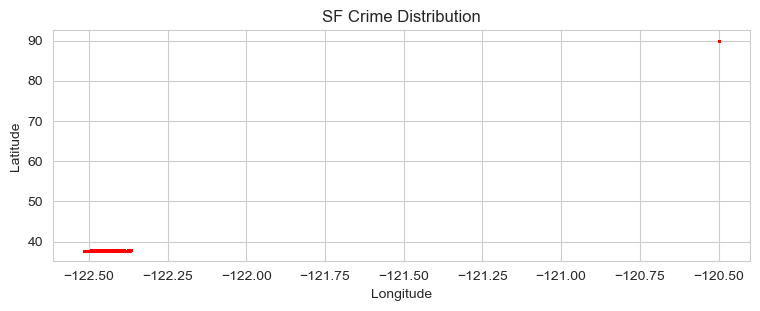

In [154]:
fig = plt.figure(figsize=[9,3])
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df.X, df.Y, s = 0.5, c = 'r')
plt.show()

In [155]:
i = df.index[df.Y > 80]
i

Index([      1,       2,       9,     537,    4371,    4916,    6825,    7322,
          8822,   16911,
       ...
       1904885, 1905905, 1917676, 1921365, 1929660, 1935507, 1943455, 1947586,
       1976165, 1995460],
      dtype='int64', length=141)

In [156]:
df.shape

(2129524, 19)

In [157]:
df.drop(i, axis=0, inplace=True)

In [158]:
df.shape

(2129383, 19)

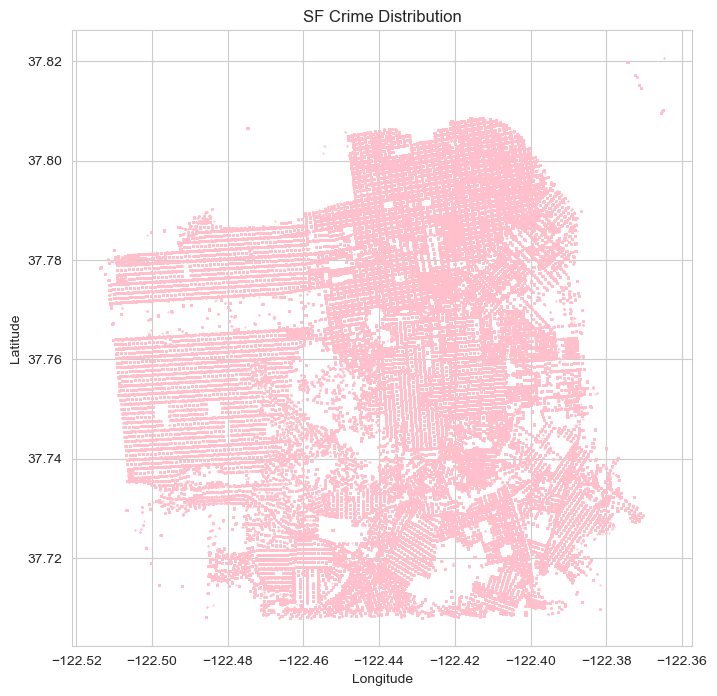

In [159]:
fig = plt.figure(figsize=[8,8])
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df.X, df.Y, s = 0.2, c = 'pink')
plt.show()

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


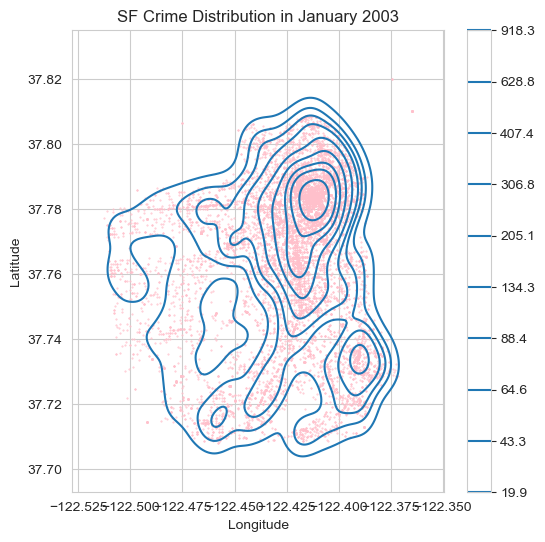

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


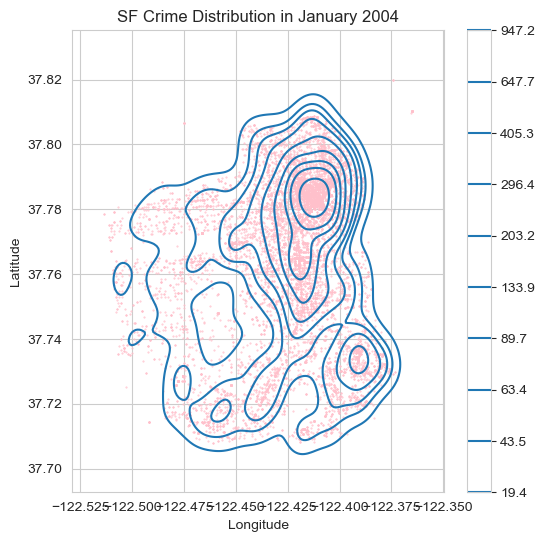

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


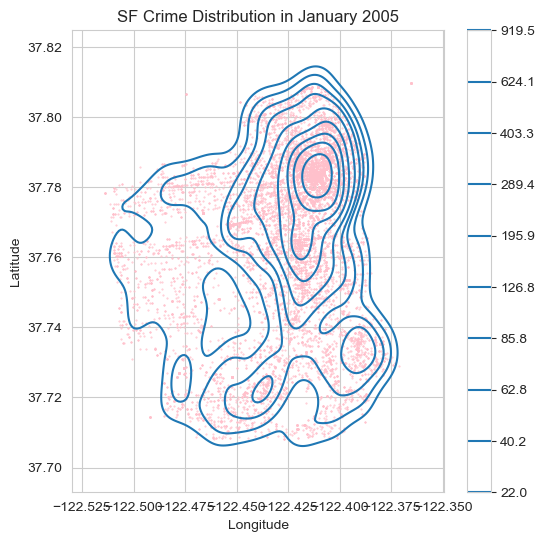

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


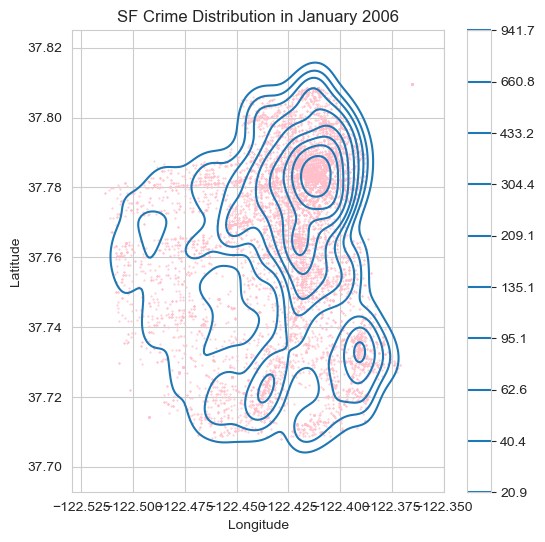

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


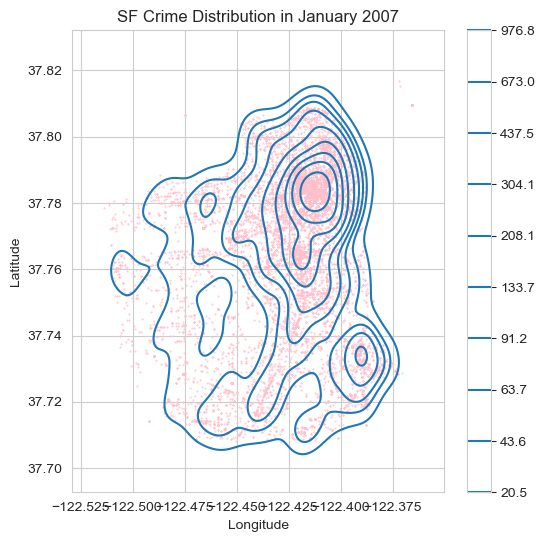

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


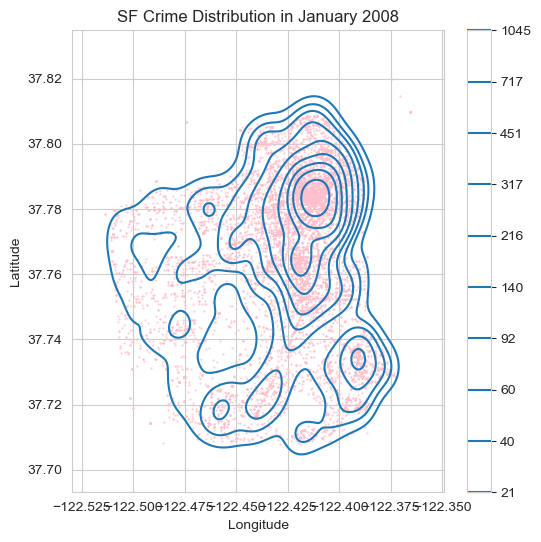

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


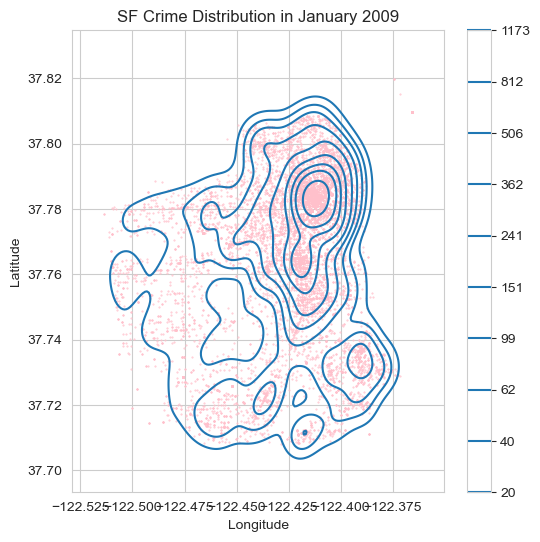

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


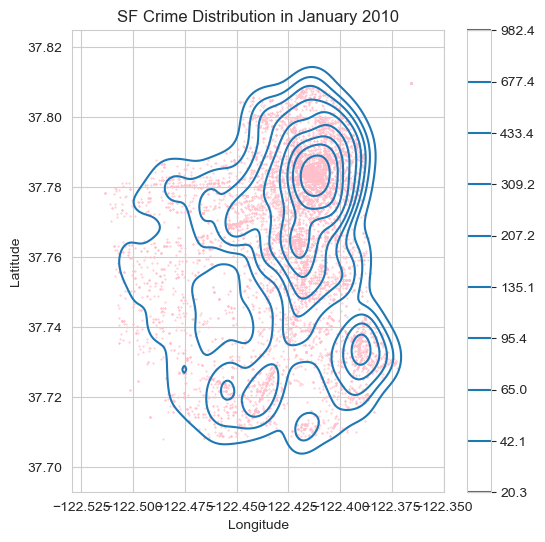

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


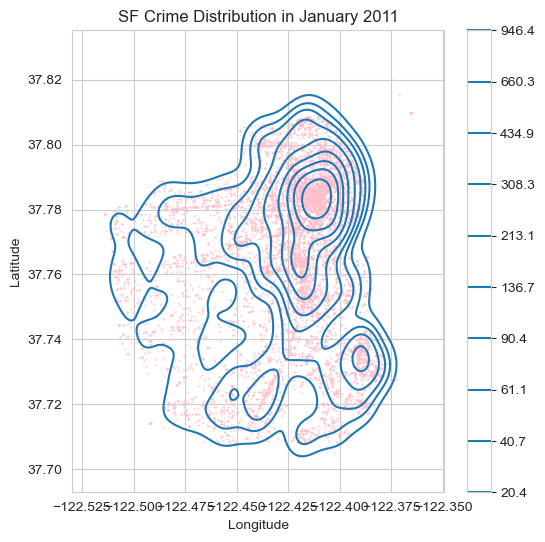

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


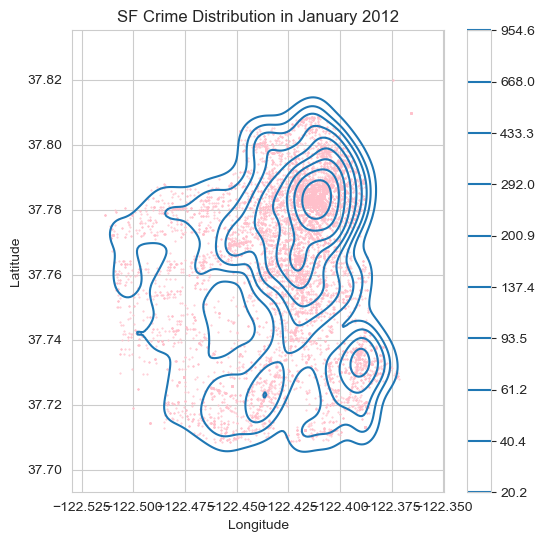

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


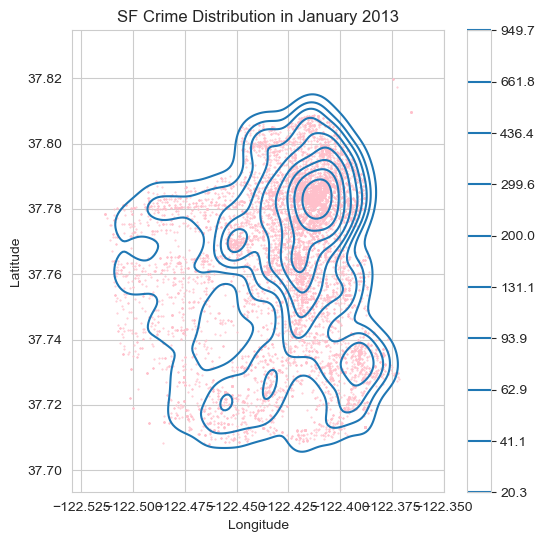

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


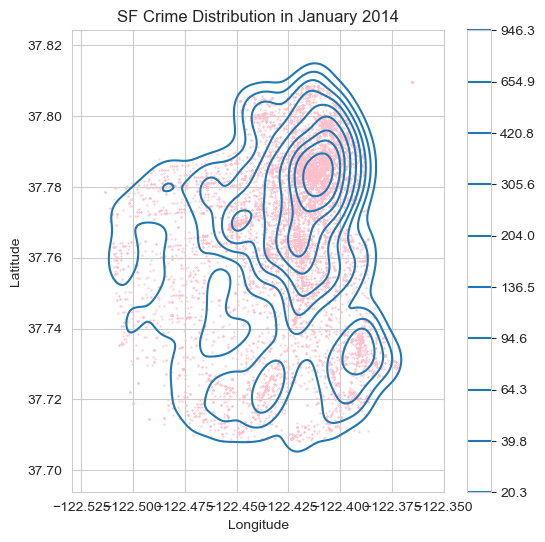

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


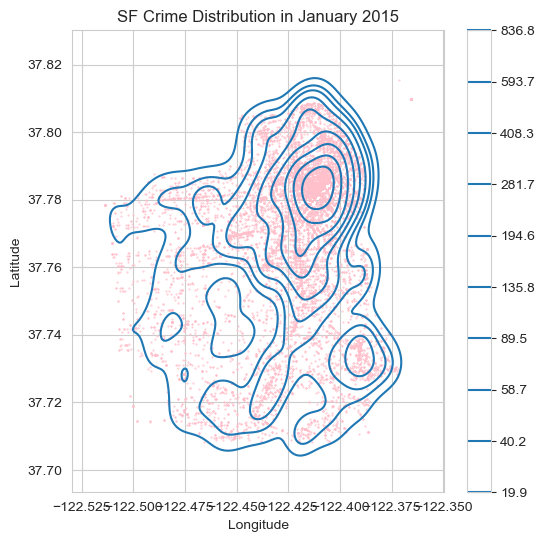

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


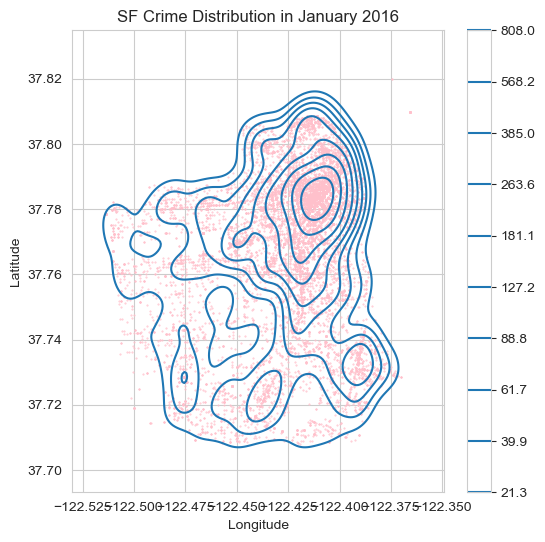

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


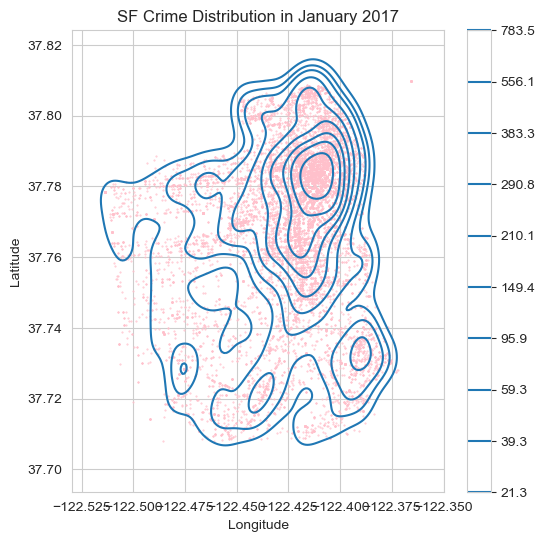

/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ananthakrishnakalle/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


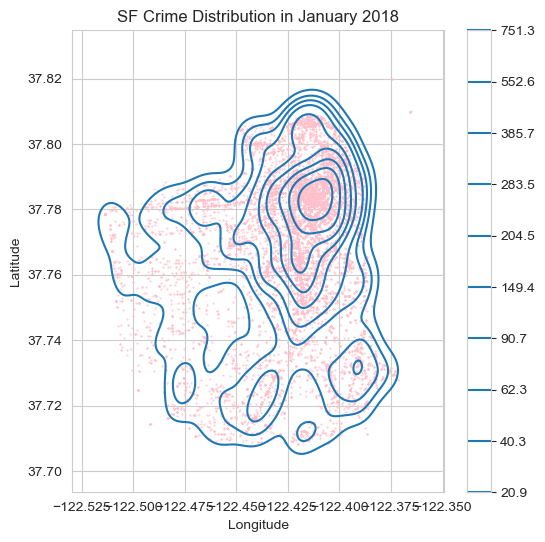

In [172]:
for yr in range(2003, 2019): 
    df_jan = df[(df.Month == 1) & (df.Year == yr)]
    fig = plt.figure(figsize=[6,6])
    plt.title('SF Crime Distribution in January ' + str(yr))
    # contour
    ax = sns.kdeplot(x=df_jan.X, y=df_jan.Y, cbar=True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
   
    # scatter
    plt.scatter(df_jan.X, df_jan.Y, s = 0.2, c = 'pink') 
    plt.show()

## Time Series Analysis

In [173]:
df.Date.sample()

1172867   2015-07-29
Name: Date, dtype: datetime64[ns]

In [174]:
print('The time span is', df.length.max()-df.length.min(), 'years')

The time span is 15.378082191780823 years


In [175]:
df.isnull().any()

PdId             False
IncidntNum       False
Incident Code    False
Category         False
Descript         False
DayOfWeek        False
Date             False
Time             False
PdDistrict       False
Resolution       False
Address          False
X                False
Y                False
location         False
length           False
Year             False
Month            False
Day              False
Time_float       False
dtype: bool

In [176]:
df.Date.max()

Timestamp('2018-05-15 00:00:00')

In [177]:
time_span = pd.date_range('2003-01-01', '2018-05-15')

In [178]:
def df_to_TimeSeries(df):
    date = pd.to_datetime(df.Date.value_counts().index)
    index = sorted(date)
    data = df.Date.value_counts().values[np.argsort(date)]
    ts = pd.DataFrame(data = data, index = index, columns = ['count'])
    # if a date within the time span does not exist, fill it in with count = 0
    ts = ts.reindex(time_span, fill_value=0) 
    return ts

In [179]:
all_numbers = df_to_TimeSeries(df)

In [180]:
all_numbers.describe()

count
count  5614.000000
mean    379.298717
std      48.571792
min       0.000000
25%     348.000000
50%     379.000000
75%     410.000000
max     627.000000

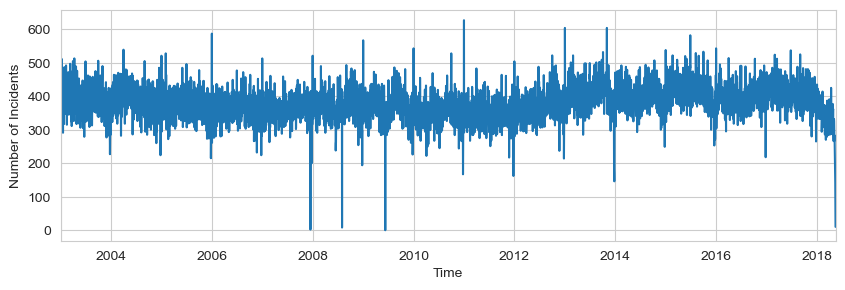

In [181]:
# plot the time series
fig = plt.figure(figsize=(10,3))
all_numbers['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

In [182]:
crimes = df.Category.value_counts().nlargest(10).index.tolist()
crimes

['LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'VEHICLE THEFT',
 'DRUG/NARCOTIC',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY',
 'SUSPICIOUS OCC']

In [183]:
# define a function to check the trend of the top 10 crimes
def check_crime(crime_name, full_name):
    """
    Covert a crime to time series;
    Visualize the trend of the crime
    - crime_name is the variable name in the dataframe
    - full_name is the full variable name
    """
    df_crime = df.loc[(df['Category'] == crime_name), :]
    crime_counts = df_to_TimeSeries(df_crime)
    fig = plt.figure(figsize=(10,3))
    crime_counts['count'].plot()
    plt.xlabel('Time')
    plt.ylabel('Number of '+ full_name+' Incidents')
    plt.title(full_name)
    plt.show()
    return crime_counts

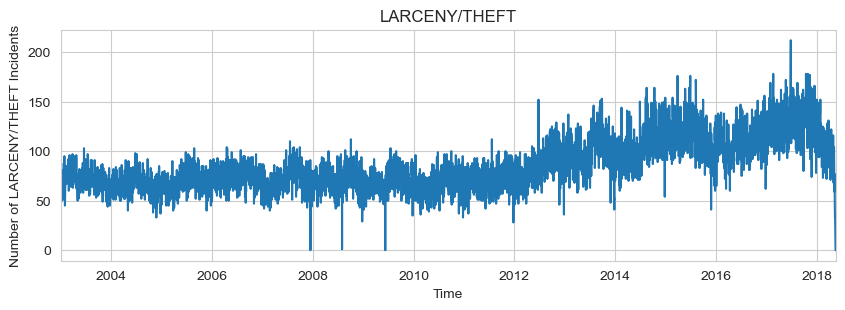

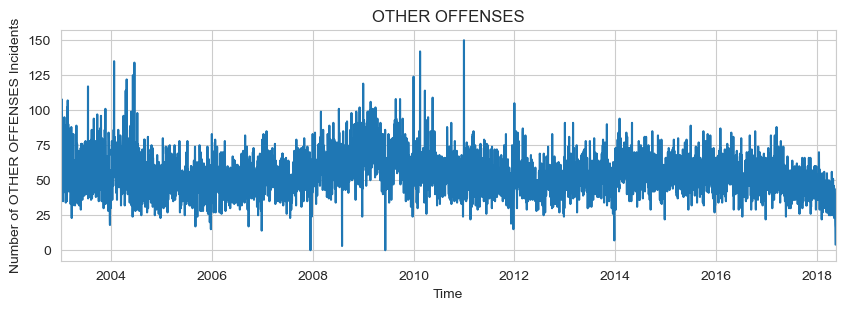

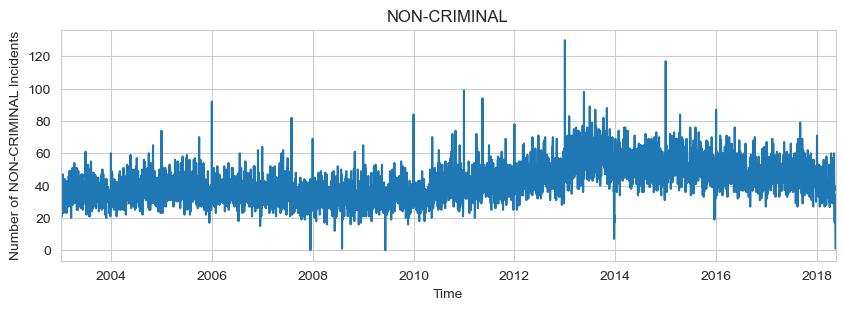

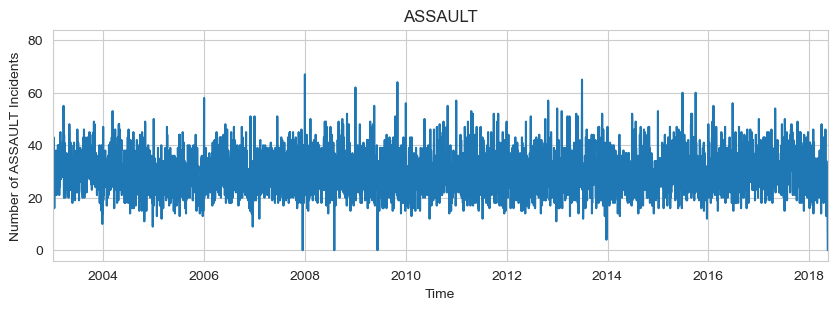

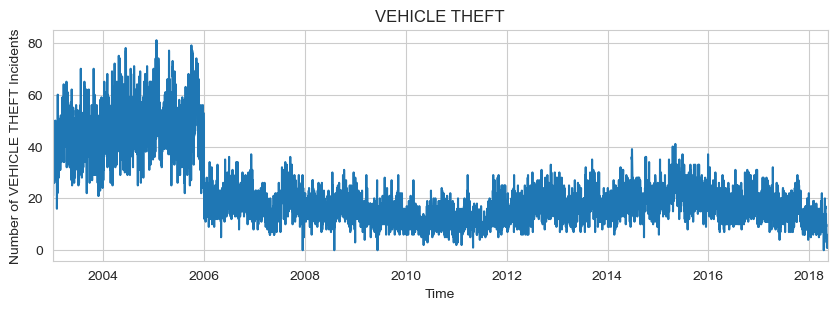

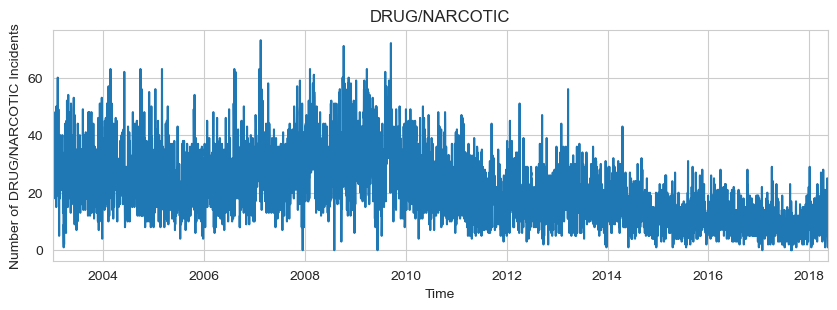

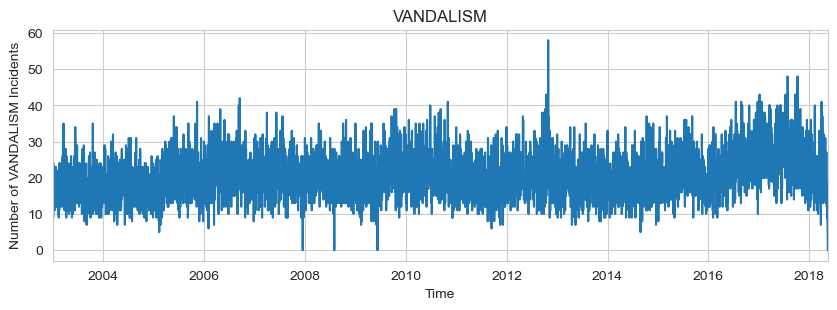

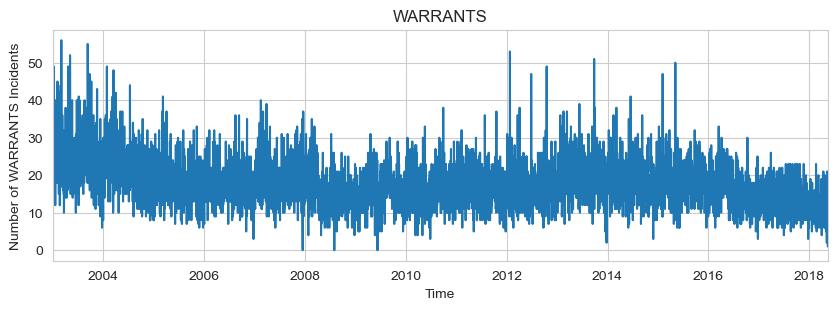

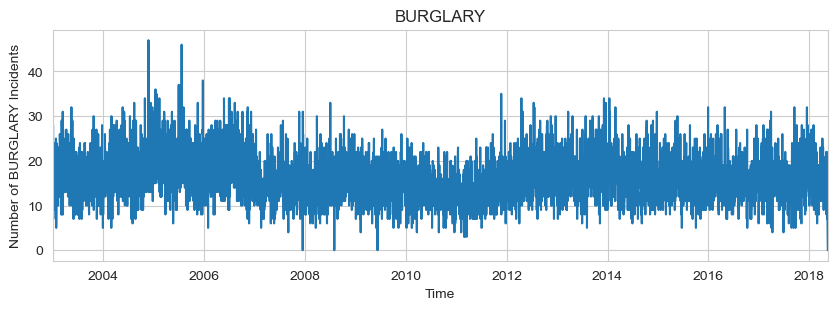

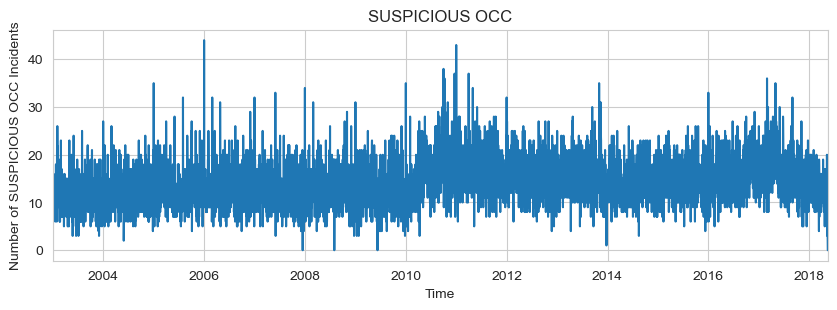

In [184]:
dict_crime = {}
for crime in crimes:
    #check_crime(crime, crime)
    dict_crime["counts_{0}".format(crime)] = check_crime(crime, crime)

## Modeling of "LARCENY/THEFT"

In [185]:
dict_crime.keys()

dict_keys(['counts_LARCENY/THEFT', 'counts_OTHER OFFENSES', 'counts_NON-CRIMINAL', 'counts_ASSAULT', 'counts_VEHICLE THEFT', 'counts_DRUG/NARCOTIC', 'counts_VANDALISM', 'counts_WARRANTS', 'counts_BURGLARY', 'counts_SUSPICIOUS OCC'])

In [186]:
dict_crime['counts_LARCENY/THEFT'].describe()

count
count  5614.000000
mean     85.134663
std      25.459946
min       0.000000
25%      67.000000
50%      79.000000
75%     100.000000
max     212.000000

In [187]:
y = dict_crime['counts_LARCENY/THEFT'].resample('MS').sum()

In [188]:
y.tail()

count
2018-01-01   3816
2018-02-01   2906
2018-03-01   3100
2018-04-01   2919
2018-05-01    869

In [189]:
y = y[:-1]
y.tail()

count
2017-12-01   4059
2018-01-01   3816
2018-02-01   2906
2018-03-01   3100
2018-04-01   2919

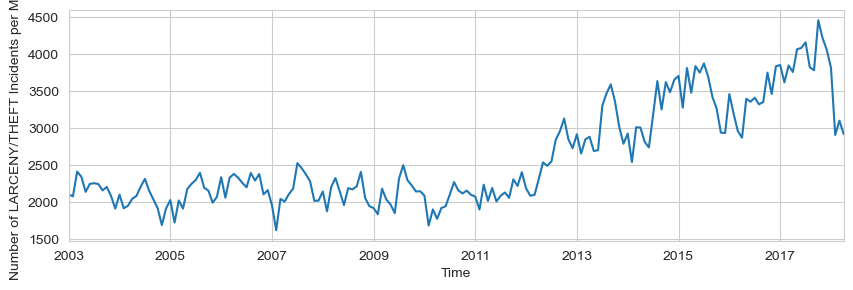

In [190]:
fig = plt.figure(figsize=(10,3))
y['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.show()

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

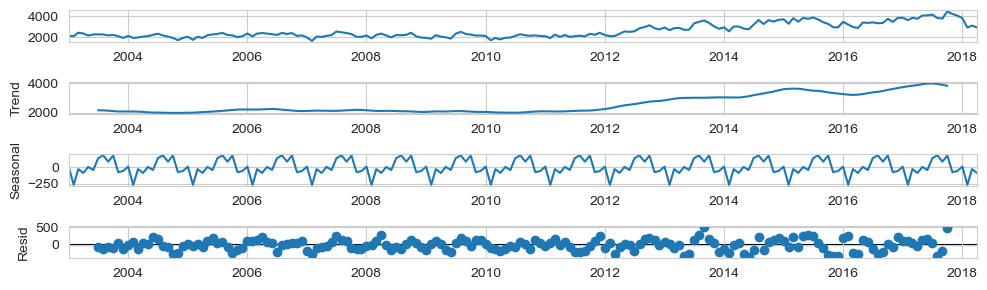

In [192]:
plt.rcParams['figure.figsize'] = 10, 3
decomposition = seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [193]:
len(y)

184

In [194]:
y_train, y_test = y[:-12], y[-12:]

In [195]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [196]:
import warnings
warnings.filterwarnings("ignore")
aic_min = float("inf")
param = (0,0,0,0,0,0)
best_model = None

for x1 in pdq:
    for x2 in seasonal_pdq:
        try:
            mod = SARIMAX(y_train,
                          order = x1,
                          seasonal_order = x2,
                          enforce_stationarity = False,
                          enforce_invertibility = False)
            results = mod.fit()
            print("(p,d,q,P,D,Q,S) = {}: AIC = {}".format(x1 + x2, results.aic))
            if results.aic < aic_min:
                aic_min = results.aic
                param = x1 + x2
                best_model = mod
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.22121D+00    |proj g|=  7.54063D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   7.541D-07   9.221D+00
  F =   9.2212070859642878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 0, 12): AIC = 3174.095237571715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  7.69041D+00    |proj g|=  4.76823D+00

At iterate   30    f=  7.54570D+00    |proj g|=  6.90449D-02

At iterate   35    f=  7.54545D+00    |proj g|=  7.51365D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     48      1     0     0   2.749D-05   7.545D+00
  F =   7.5454520130020173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 1, 12): AIC = 2601.635492472694
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At i

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.06649D+00    |proj g|=  1.29379D-03

At iterate   15    f=  8.06386D+00    |proj g|=  2.11337D-02
  ys=-6.345E+00  -gs= 6.764E-01 BFGS update SKIPPED

At iterate   20    f=  6.73368D+00    |proj g|=  5.77468D-01

At iterate   25    f=  6.61999D+00    |proj g|=  4.80183D-02

At iterate   30    f=  6.53941D+00    |proj g|=  2.95466D-02

At iterate   35    f=  6.52149D+00    |proj g|=  7.42341D-02

At iterate   40    f=  6.49956D+00    |proj g|=  6.23180D-02

At iterate   45    f=  6.49155D+00    |proj g|=  3.99868D-02

At iterate   50    f=  6.48513D+00    |proj g|=  4.46263D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00610D+00    |proj g|=  1.55056D-01

At iterate    5    f=  5.98712D+00    |proj g|=  9.83495D-02

At iterate   10    f=  5.98389D+00    |proj g|=  9.10008D-04

At iterate   15    f=  5.97421D+00    |proj g|=  6.53287D-02

At iterate   20    f=  5.94787D+00    |proj g|=  3.93526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   2.852D-05   5.948D+00
  F =   5.9478622107095944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0,

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     20      1     0     0   7.544D-06   5.638D+00
  F =   5.6380381093718182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 1, 1, 12): AIC = 1943.4851096239054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21450D+00    |proj g|=  5.17373D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segm

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   4.118D-05   6.632D+00
  F =   6.6318703905127938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 0, 0, 12): AIC = 2285.363414336401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14727D+00    |proj g|=  8.66666D-02

At iterate    5    f=  6.14353D+00    |proj g|=  3.35326D-04

At iterate   10    f=  6.14345D+00    |proj g|=  1.02605D-02

At iterate   15    f=  6.14290D+00    |proj g|=  7.89248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored duri

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.07816D+00    |proj g|=  1.66803D-02

At iterate   10    f=  6.07778D+00    |proj g|=  7.37943D-03

At iterate   15    f=  6.07408D+00    |proj g|=  1.05999D-01

At iterate   20    f=  6.05465D+00    |proj g|=  1.44576D-02

At iterate   25    f=  6.05426D+00    |proj g|=  2.52619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     66      2     0     0   1.026D-05   6.054D+00
  F =   6.0542550629134313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 0, 1, 12): AIC = 2090.6637416422204
RUNNING THE L-BFGS-B CODE

           * * *

M

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.71292D+00    |proj g|=  5.39738D-03

At iterate   10    f=  5.71286D+00    |proj g|=  7.43350D-03

At iterate   15    f=  5.70879D+00    |proj g|=  8.39063D-02

At iterate   20    f=  5.67422D+00    |proj g|=  8.97950D-02

At iterate   25    f=  5.67359D+00    |proj g|=  1.94658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   2.026D-05   5.674D+00
  F =   5.6735868847423347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 1, 1, 12): AIC = 1957.713888351363
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.13531D+00    |proj g|=  1.75429D-01

At iterate   30    f=  6.13414D+00    |proj g|=  1.79589D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     42      1     0     0   7.726D-06   6.134D+00
  F =   6.1341420750447195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 0, 1, 12): AIC = 2118.1448738153836
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78156D+00    |proj g|=  1.57833D-01

At

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.67186D+00    |proj g|=  1.58179D-03

At iterate   15    f=  5.67127D+00    |proj g|=  3.69170D-02

At iterate   20    f=  5.64937D+00    |proj g|=  2.37072D-01

At iterate   25    f=  5.63002D+00    |proj g|=  3.64881D-03

At iterate   30    f=  5.62999D+00    |proj g|=  2.41376D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     33      1     0     0   2.414D-05   5.630D+00
  F =   5.6299871609186347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 1, 1, 12): AIC = 1944.7155833560103
RUNNING THE L-BFGS-B CODE

           * * *

M

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.11932D+00    |proj g|=  1.15073D-03

At iterate   20    f=  6.11908D+00    |proj g|=  2.61519D-02

At iterate   25    f=  6.10645D+00    |proj g|=  7.38953D-02

At iterate   30    f=  6.09493D+00    |proj g|=  1.22983D-02

At iterate   35    f=  6.09478D+00    |proj g|=  1.61109D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     48      1     0     0   1.242D-04   6.095D+00
  F =   6.0947771876341825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 0, 1, 12): AIC = 2106.603352546159
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.67190D+00    |proj g|=  4.48064D-03

At iterate   15    f=  5.67168D+00    |proj g|=  1.08358D-02

At iterate   20    f=  5.65978D+00    |proj g|=  1.15710D-01

At iterate   25    f=  5.62989D+00    |proj g|=  5.99319D-03

At iterate   30    f=  5.62982D+00    |proj g|=  1.84381D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   8.028D-07   5.630D+00
  F =   5.6298206760232166     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 1, 1, 12): AIC = 1946.6583125519865
RUNNING THE L-BFGS-B CODE

           * * *

M

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69084D+00    |proj g|=  6.31480D-02

At iterate    5    f=  5.68779D+00    |proj g|=  1.70721D-03

At iterate   10    f=  5.68558D+00    |proj g|=  4.38890D-02

At iterate   15    f=  5.63770D+00    |proj g|=  6.20982D-02

At iterate   20    f=  5.63471D+00    |proj g|=  4.99636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   4.996D-06   5.635D+00
  F =   5.6347135778743569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 1, 1, 12): AIC = 1944.3414707

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.68713D+00    |proj g|=  2.19078D-02

At iterate   15    f=  5.64346D+00    |proj g|=  1.13701D-01

At iterate   20    f=  5.63473D+00    |proj g|=  4.04812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   2.512D-07   5.635D+00
  F =   5.6346903195125986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 1, 1, 12): AIC = 1946.3334699123338
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.24209D+00    |proj g|=  2.47484D-04

At iterate   10    f=  6.24197D+00    |proj g|=  1.62337D-02

At iterate   15    f=  6.24115D+00    |proj g|=  6.16205D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     26      1     0     0   5.905D-07   6.241D+00
  F =   6.2411388782822828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 1, 0, 12): AIC = 2152.951774129105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.05021D+00    |proj g|=  9.70100D-02

At iterate   30    f=  6.04590D+00    |proj g|=  5.33410D-03

At iterate   35    f=  6.04588D+00    |proj g|=  3.48936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     43      1     0     0   8.094D-06   6.046D+00
  F =   6.0458806979657940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 1, 1, 0, 1, 12): AIC = 2089.782960100233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.



At iterate   25    f=  5.59713D+00    |proj g|=  1.47501D-04

At iterate   30    f=  5.59713D+00    |proj g|=  1.26956D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   1.270D-06   5.597D+00
  F =   5.5971262682729197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 1, 1, 1, 1, 12): AIC = 1935.4114362858845


In [197]:
print("The Best parameters are: (p,d,q,P,D,Q,S) =", param)

The Best parameters are: (p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 1, 12)


In [198]:
results  ==  best_model.fit()
results.summary().tables[1]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64993D+00    |proj g|=  6.66281D-02

At iterate    5    f=  5.64670D+00    |proj g|=  4.69464D-03

At iterate   10    f=  5.63795D+00    |proj g|=  6.36140D-02

At iterate   15    f=  5.59470D+00    |proj g|=  1.58903D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   2.987D-06   5.594D+00
  F =   5.5938480346500423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.table.SimpleTable'>

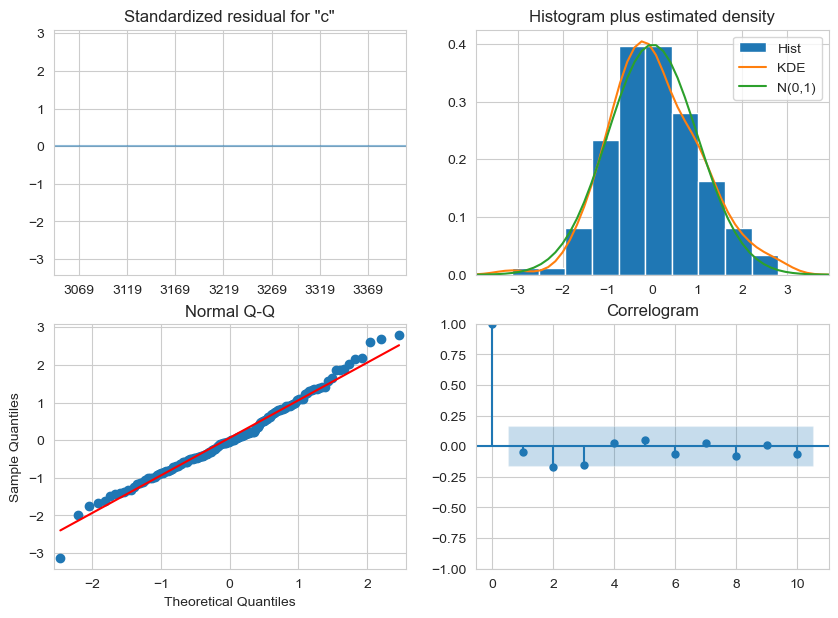

In [199]:
results.plot_diagnostics(figsize=(10, 7))
plt.show()

In [200]:
from  statsmodels.tsa.stattools import adfuller

result = adfuller(y['count'].values[1:])
print("-- Before taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

diff = y.diff()
result = adfuller(diff['count'].values[1:])
print("-- After taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

-- Before taking the difference --
ADF Statistic: -1.0565441880712088
p-value: 0.7320869959490801
-- After taking the difference --
ADF Statistic: -3.5734499361299084
p-value: 0.006289371523278596


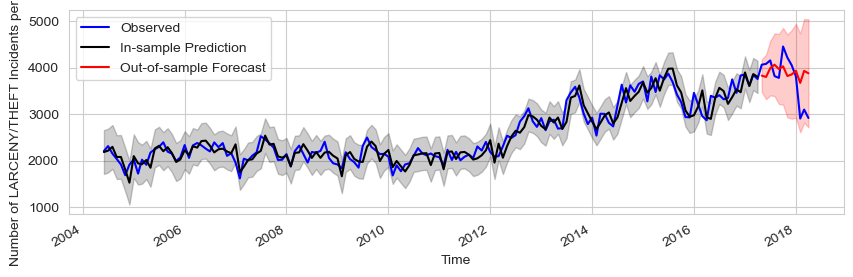

In [201]:
# neglect the beginning of the time series, where the model hasn't converged
pred = results.get_prediction(start = y_train['2004-06':].index[0],  dynamic=False)
pred_ci = pred.conf_int() # 95% confidence interval 

forecast = results.get_forecast(steps=12) # forecast for the next 12 months
forecast_ci = forecast.conf_int() # 95% confidence interval 

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(y['2004-06':].index, y['2004-06':], label='Observed', color='b')

pred.predicted_mean.plot(ax=ax, label='In-sample Prediction', color='k')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

forecast.predicted_mean.plot(ax=ax, label='Out-of-sample Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of LARCENY/THEFT Incidents per Month')
plt.legend()
plt.show()

## Modeling of "NON-CRIMINAL"

In [202]:
dict_crime.keys()

dict_keys(['counts_LARCENY/THEFT', 'counts_OTHER OFFENSES', 'counts_NON-CRIMINAL', 'counts_ASSAULT', 'counts_VEHICLE THEFT', 'counts_DRUG/NARCOTIC', 'counts_VANDALISM', 'counts_WARRANTS', 'counts_BURGLARY', 'counts_SUSPICIOUS OCC'])

In [203]:
y2 = dict_crime['counts_NON-CRIMINAL'].resample('MS').sum()

In [204]:
y2 = y2[:-1]

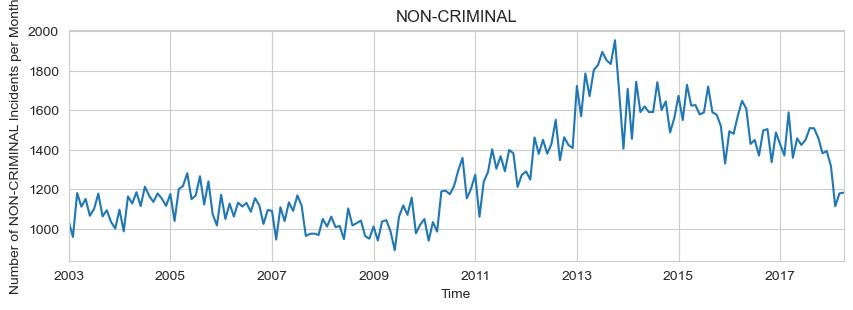

In [205]:
fig = plt.figure(figsize=(10,3))
y2['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of NON-CRIMINAL Incidents per Month')
plt.title('NON-CRIMINAL')
plt.show()

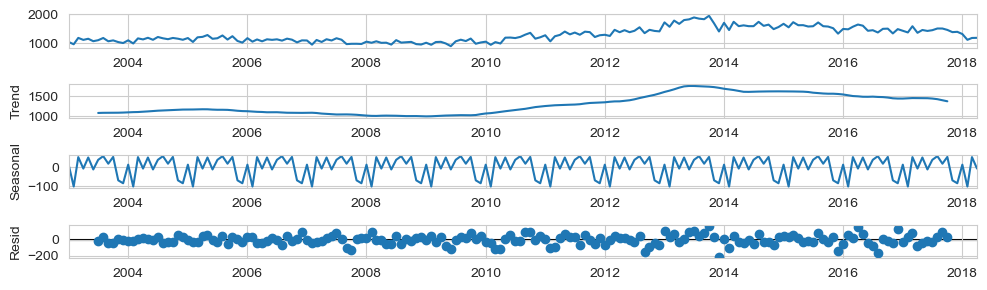

In [206]:
plt.rcParams['figure.figsize'] = 10, 3
decomposition = seasonal_decompose(y2, model='additive')
decomposition.plot()
plt.show()

In [207]:
y2_train, y2_test = y2[:-12], y2[-12:]

In [208]:
import  itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [209]:
warnings.filterwarnings("ignore")
aic_min = float("inf")
param = (0,0,0,0,0,0)
best_model = None

for x1 in pdq:
    for x2 in seasonal_pdq:
        try:
            mod = SARIMAX(y2_train,
                          order = x1,
                          seasonal_order = x2,
                          enforce_stationarity = False,
                          enforce_invertibility = False)
            results = mod.fit()
            print("(p,d,q,P,D,Q,S) = {}: AIC = {}".format(x1 + x2, results.aic))
            if results.aic < aic_min:
                aic_min = results.aic
                param = x1 + x2
                best_model = mod
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54335D+00    |proj g|=  1.62874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.629D-06   8.543D+00
  F =   8.5433527387942281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 0, 12): AIC = 2940.9133421452143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 1, 0, 12): AIC = 1977.692562274922
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35947D+00    |proj g|=  1.97030D-01

At iterate    5    f=  5.33179D+00    |proj g|=  6.04961D-03

At iterate   10    f=  5.32254D+00    |proj g|=  9.09844D-02

At iterate   15    f=  5.30989D+00    |proj g|=  4.78967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   5.014D-07   5.310D+00
  F =   5.3098872194176545     

CON

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 1, 12): AIC = 1974.2384224835753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41724D+00    |proj g|=  1.17002D-01

At iterate    5    f=  5.39915D+00    |proj g|=  1.74613D-03

At iterate   10    f=  5.39681D+00    |proj g|=  6.03591D-02

At iterate   15    f=  5.37445D+00    |proj g|=  2.32675D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   6.548D-06   5.374D+00
  F =   5.3741743515018241     

CO

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


(p,d,q,P,D,Q,S) = (0, 1, 0, 1, 1, 0, 12): AIC = 1776.3386262038491
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08095D+00    |proj g|=  9.88461D-02

At iterate    5    f=  5.04420D+00    |proj g|=  2.42901D-02

At iterate   10    f=  5.04356D+00    |proj g|=  1.71509D-02

At iterate   15    f=  5.02611D+00    |proj g|=  1.13483D-01

At iterate   20    f=  5.01863D+00    |proj g|=  8.28352D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97886D+00    |proj g|=  8.53765D-02

At iterate    5    f=  4.97279D+00    |proj g|=  4.90542D-03

At iterate   10    f=  4.96352D+00    |proj g|=  1.06107D-01

At iterate   15    f=  4.91019D+00    |proj g|=  3.72985D-02

At iterate   20    f=  4.90807D+00    |proj g|=  6.75282D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   6.753D-07   4.908D+00
  F =   4.9080749463263809     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 0, 1, 12): AIC = 1831.9384032903858
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08856D+00    |proj g|=  2.89794D-02

At iterate    5    f=  5.08741D+00    |proj g|=  1.99372D-02

At iterate   10    f=  5.07145D+00    |proj g|=  6.41307D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.685D-06   5.069D+00
  F =   5.0688597514186284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.04096D+00    |proj g|=  3.35417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.469D-05   5.041D+00
  F =   5.0409560615957236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 0, 0, 1, 1, 12): AIC = 1740.088885188929
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69898D+00    |proj g|=  4.62298D-01

At iterate    5    f=  5.57872D+00    |proj g|=  1.80872D-03

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.12030D+00    |proj g|=  8.02163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.572D-07   5.120D+00
  F =   5.1202958953520898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 1, 0, 12): AIC = 1767.3817880011188
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15122D+00    |proj g|=  1.99514D-01

At iterate    5    f=  5.08474D+00    |proj g|=  3.11498D-02

At

 This problem is unconstrained.
 This problem is unconstrained.


(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 1, 1, 12): AIC = 1741.7666345824755
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90818D+00    |proj g|=  5.89841D-01

At iterate    5    f=  5.90798D+00    |proj g|=  2.75241D-01

At iterate   10    f=  5.90722D+00    |proj g|=  1.28538D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.045D-04   5.907D+00
  F =   5.9072217805023879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.98757D+00    |proj g|=  7.06386D-02

At iterate   20    f=  4.93848D+00    |proj g|=  1.05991D-01

At iterate   25    f=  4.93770D+00    |proj g|=  2.76858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   3.574D-05   4.938D+00
  F =   4.9376960528363947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 1, 1, 12): AIC = 1706.5674421757199
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.33344D+00    |proj g|=  5.95323D-02

At iterate   35    f=  5.33276D+00    |proj g|=  4.72927D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     45      1     0     0   7.170D-05   5.333D+00
  F =   5.3327593456636313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 0, 1, 12): AIC = 1844.4692149082891
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17965D+00    |proj g|=  3.86226D-01

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.94235D+00    |proj g|=  5.72097D-01

At iterate   25    f=  4.93649D+00    |proj g|=  2.25960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   7.633D-05   4.936D+00
  F =   4.9364875671439723     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 1, 1, 12): AIC = 1708.1517230975264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90531D+00    |proj g|=  6.82867D-06

  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.43978D+00    |proj g|=  2.41798D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   7.596D-06   5.440D+00
  F =   5.4395133196048215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 0, 0, 12): AIC = 1877.1925819440585
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41724D+00    |proj g|=  2.63879D-01

At iterate    5    f=  5.38980D+00    |proj g|=  3.84426D-02

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.95708D+00    |proj g|=  2.55866D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   1.876D-06   4.957D+00
  F =   4.9570773205868850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 1, 1, 12): AIC = 1713.2345982818883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85248D+00    |proj g|=  8.66187D-03

At iterate    5    f=  5.85218D+00    |proj g|=  1.53424D-04

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.96859D+00    |proj g|=  2.63381D-02

At iterate   15    f=  4.90937D+00    |proj g|=  4.08000D-02

At iterate   20    f=  4.90795D+00    |proj g|=  3.77369D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   3.774D-06   4.908D+00
  F =   4.9079545997036300     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 1, 1, 12): AIC = 1696.3363822980486
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  4.96229D+00    |proj g|=  5.59494D-02

At iterate   20    f=  4.90832D+00    |proj g|=  3.76609D-02

At iterate   25    f=  4.90698D+00    |proj g|=  4.93804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   8.232D-06   4.907D+00
  F =   4.9069797368064165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 1, 1, 1, 1, 12): AIC = 1698.0010294614071


In [210]:
print("The Best parameters are: (p,d,q,P,D,Q,S) =", param)

The Best parameters are: (p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 1, 12)


In [211]:
results = best_model.fit()
results.summary().tables[1]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97886D+00    |proj g|=  8.53765D-02

At iterate    5    f=  4.97279D+00    |proj g|=  4.90542D-03

At iterate   10    f=  4.96352D+00    |proj g|=  1.06107D-01

At iterate   15    f=  4.91019D+00    |proj g|=  3.72985D-02

At iterate   20    f=  4.90807D+00    |proj g|=  6.75282D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   6.753D-07   4.908D+00
  F =   4.9080749463263809     

CONVERG

 This problem is unconstrained.


<class 'statsmodels.iolib.table.SimpleTable'>

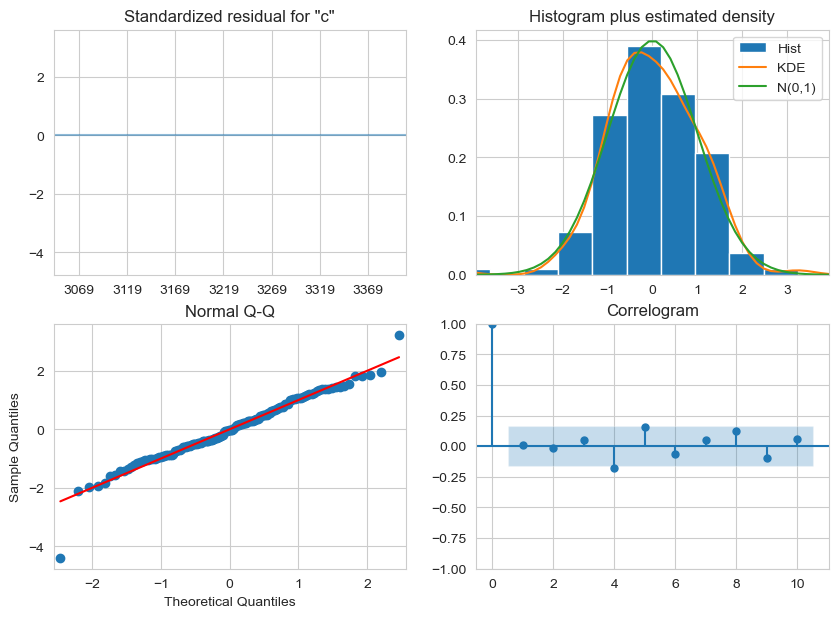

In [212]:
results.plot_diagnostics(figsize=(10, 7))
plt.show()

In [213]:
from  statsmodels.tsa.stattools import adfuller

result = adfuller(y2['count'].values[1:])
print("-- Before taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

diff = y2.diff()
result = adfuller(diff['count'].values[1:])
print("-- After taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

-- Before taking the difference --
ADF Statistic: -1.3988741050755726
p-value: 0.5828157675154303
-- After taking the difference --
ADF Statistic: -2.7955385365764975
p-value: 0.05891388782640278


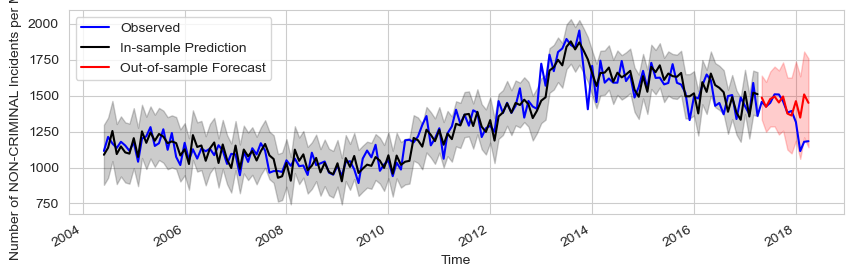

In [214]:
# neglect the beginning of the time series, where the model hasn't converged
pred = results.get_prediction(start = y2_train['2004-06':].index[0],  dynamic=False)
pred_ci = pred.conf_int() # 95% confidence interval 

forecast = results.get_forecast(steps=12) # forecast for the next 12 months
forecast_ci = forecast.conf_int() # 95% confidence interval 

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(y2['2004-06':].index, y2['2004-06':], label='Observed', color='b')

pred.predicted_mean.plot(ax=ax, label='In-sample Prediction', color='k')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

forecast.predicted_mean.plot(ax=ax, label='Out-of-sample Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of NON-CRIMINAL Incidents per Month')
plt.legend()
plt.show()


## Modeling of "ASSAULT"

In [215]:
dict_crime.keys()

dict_keys(['counts_LARCENY/THEFT', 'counts_OTHER OFFENSES', 'counts_NON-CRIMINAL', 'counts_ASSAULT', 'counts_VEHICLE THEFT', 'counts_DRUG/NARCOTIC', 'counts_VANDALISM', 'counts_WARRANTS', 'counts_BURGLARY', 'counts_SUSPICIOUS OCC'])

In [216]:
y3 = dict_crime['counts_ASSAULT'].resample('MS').sum()

In [217]:
y3 = y3[:-1]

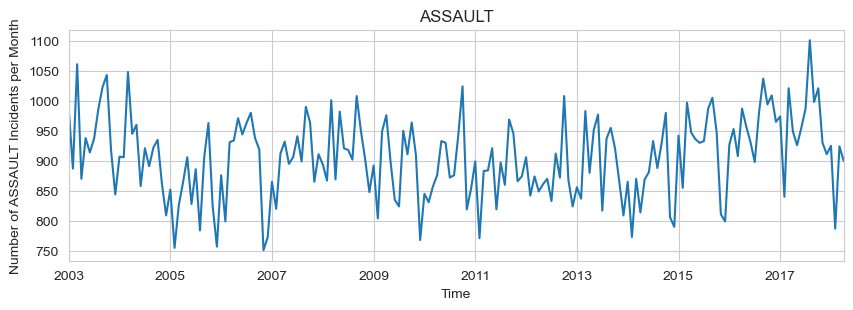

In [218]:
fig = plt.figure(figsize=(10,3))
y3['count'].plot()
plt.xlabel('Time')
plt.ylabel('Number of ASSAULT Incidents per Month')
plt.title('ASSAULT')
plt.show()

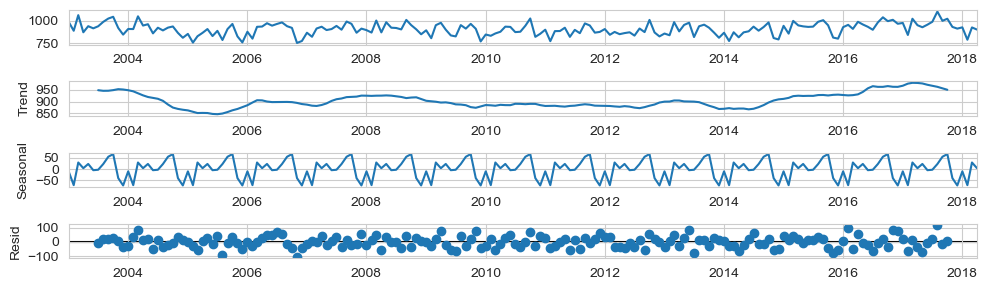

In [219]:
plt.rcParams['figure.figsize'] = 10, 3
decomposition = seasonal_decompose(y3, model='additive')
decomposition.plot()
plt.show()

In [220]:
y3_train, y3_test = y3[:-12], y3[-12:]

In [221]:
import  itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [222]:
warnings.filterwarnings("ignore")
aic_min = float("inf")
param = (0,0,0,0,0,0)
best_model = None

for x1 in pdq:
    for x2 in seasonal_pdq:
        try:
            mod = SARIMAX(y3_train,
                          order = x1,
                          seasonal_order = x2,
                          enforce_stationarity = False,
                          enforce_invertibility = False)
            results = mod.fit()
            print("(p,d,q,P,D,Q,S) = {}: AIC = {}".format(x1 + x2, results.aic))
            if results.aic < aic_min:
                aic_min = results.aic
                param = x1 + x2
                best_model = mod
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17895D+00    |proj g|=  1.20952D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.210D-06   8.179D+00
  F =   8.1789549034677265     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 0, 0, 0, 0, 0, 12): AIC = 2815.560486792898
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0        

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.78540D+00    |proj g|=  7.67011D-04

At iterate   10    f=  7.77480D+00    |proj g|=  1.50993D-01

At iterate   15    f=  7.58158D+00    |proj g|=  5.76345D-01

At iterate   20    f=  7.53392D+00    |proj g|=  8.54636D-03

           * * *

Tit   = total number of iterations
(p,d,q,P,D,Q,S) = (0, 0, 1, 0, 0, 0, 12): AIC = 2595.6672087115853
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     37      1     0     0   4.416D-06   7.534D+00
  F =   7.5339163043941433     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19034D+00    |proj g|=  5.40712D-03

At iterate    5    f=  7.18935D+00    |proj g|=  1.02309D-03

At iterate   10    f=  7.18054D+00    |proj g|=  2.95438D-02

At iterate   15    f=  5.93128D+00    |proj g|=  1.55272D+00

At iterate   20    f=  5.58253D+00    |proj g|=  7.22650D-01

At iterate   25    f=  5.37216D+00    |proj g|=  7.41716D-01

At iterate   30    f=  5.33028D+00    |proj g|=  5.34979D-02

At iterate   35    f=  5.31437D+00    |proj g|=  9.08950D-03

At iterate   40    f=  5.30547D+00    |proj g|=  1.40096D-02

At iterate   45    f=  5.29923D+00    |proj g|=  1.41873D-02

At iterate   50    f=  5.29602D+00    |proj g|=  3.04156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     74      1     0     0   1.391D-02   4.973D+00
  F =   4.9727264299844993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0, 0, 1, 1, 0, 1, 12): AIC = 1718.6178919146678
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78713D+00    |proj g|=  2.21395D-02

At iterate    5    f=  4.78531D+00    |proj g|=  3.23407D-02

At iterate   10    f=  4.77529D+00    |proj g|=  3.17460D-03

  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   3.706D-06   5.255D+00
  F =   5.2546931967140775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 1, 0, 0, 0, 1, 12): AIC = 1811.6144596696427
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38989D+00    |proj g|=  8.87840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segm

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.50264D+00    |proj g|=  1.81697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   3.882D-06   4.503D+00
  F =   4.5026392404278308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 1, 12): AIC = 1554.907898707174
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10677D+00    |proj g|=  1.42694D-01

At iterate    5    f=  5.08550D+00    |proj g|=  9.18629D-03

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.71667D+00    |proj g|=  1.78983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   9.322D-07   4.717D+00
  F =   4.7166727441220875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 1, 0, 12): AIC = 1628.535423977998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61437D+00    |proj g|=  6.53345D-02

At iterate    5    f=  4.59826D+00    |proj g|=  2.08896D-02

At 

 This problem is unconstrained.



At iterate   20    f=  4.50176D+00    |proj g|=  1.36711D-02

At iterate   25    f=  4.50175D+00    |proj g|=  3.17719D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     39      1     0     0   1.162D-05   4.502D+00
  F =   4.5017484993391319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (0, 1, 1, 1, 1, 1, 12): AIC = 1556.6014837726614
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74370D+00    |proj g|=  6.67223D-04

  

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.24571D+00    |proj g|=  3.32924D-01

At iterate   25    f=  5.24458D+00    |proj g|=  5.43603D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     40      1     0     0   1.570D-06   5.245D+00
  F =   5.2445836620522632     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 0, 0, 12): AIC = 1810.1367797459784
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20842D+00    |proj g|=  4.77817D-01

At


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.65548D+00    |proj g|=  1.78864D-02

At iterate   10    f=  4.60664D+00    |proj g|=  2.49763D-01

At iterate   15    f=  4.58608D+00    |proj g|=  4.31454D-03

At iterate   20    f=  4.58605D+00    |proj g|=  4.22364D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   4.224D-06   4.586D+00
  F =   4.5860480960279322     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 0, 1, 1, 1, 12): AIC = 1585.6005450336086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =        


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  5.07929D+00    |proj g|=  2.78789D-02

At iterate   45    f=  5.07893D+00    |proj g|=  4.71998D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     65      1     0     0   4.720D-03   5.079D+00
  F =   5.0789333894130984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 0, 0, 1, 12): AIC = 1755.1530859581057
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16961D+00    |proj g|=  9.58301D-02

At

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  4.91844D+00    |proj g|=  1.14519D+00

At iterate   35    f=  4.91287D+00    |proj g|=  2.42217D-01

At iterate   40    f=  4.91269D+00    |proj g|=  7.25546D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     53      1     0     0   1.318D-05   4.913D+00
  F =   4.9126867855188365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 0, 1, 12): AIC = 1699.9642542184797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.59747D+00    |proj g|=  2.76386D-02

At iterate   15    f=  4.52524D+00    |proj g|=  4.29853D-02

At iterate   20    f=  4.52173D+00    |proj g|=  1.32503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   8.310D-06   4.522D+00
  F =   4.5217260484351414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 0, 1, 1, 1, 1, 12): AIC = 1565.4737606616886
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.61926D+00    |proj g|=  2.56730D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   5.652D-06   4.619D+00
  F =   4.6185401703516131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 0, 1, 1, 12): AIC = 1594.777818600955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12218D+00    |proj g|=  2.83080D-02

At iterate    5    f=  5.12136D+00    |proj g|=  1.63246D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.61349D+00    |proj g|=  1.09935D-01

At iterate   15    f=  4.60444D+00    |proj g|=  1.01114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.099D-06   4.604D+00
  F =   4.6044394728355229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
(p,d,q,P,D,Q,S) = (1, 1, 0, 1, 1, 1, 12): AIC = 1591.92717865542
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51601D+00    |proj g|=  1.74344D-01

At i

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.59809D+00    |proj g|=  6.03822D-03

At iterate   10    f=  4.58449D+00    |proj g|=  9.21847D-02

At iterate   15    f=  4.50297D+00    |proj g|=  4.59645D-02

At iterate   20    f=  4.50170D+00    |proj g|=  6.86145D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   1.720D-05   4.502D+00
  F =   4.5017022788805559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 1, 1, 0, 1, 1, 12): AIC = 1556.5855839349113
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.88127D+00    |proj g|=  6.52296D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   2.536D-05   4.881D+00
  F =   4.8812719114381400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
(p,d,q,P,D,Q,S) = (1, 1, 1, 1, 0, 1, 12): AIC = 1689.1575375347202
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71239D+00    |proj g|=  9.00514D-02

At iterate    5    f=  4.70545D+00    |proj g|=  3.40132D-03

At

In [223]:
print("The Best parameters are: (p,d,q,P,D,Q,S) =", param)

The Best parameters are: (p,d,q,P,D,Q,S) = (0, 1, 1, 0, 1, 1, 12)


In [224]:
results = best_model.fit()
results.summary().tables[1]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60847D+00    |proj g|=  1.22611D-01

At iterate    5    f=  4.59875D+00    |proj g|=  8.14299D-03

At iterate   10    f=  4.57075D+00    |proj g|=  1.53943D-01

At iterate   15    f=  4.50264D+00    |proj g|=  1.81697D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   3.882D-06   4.503D+00
  F =   4.5026392404278308     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.table.SimpleTable'>

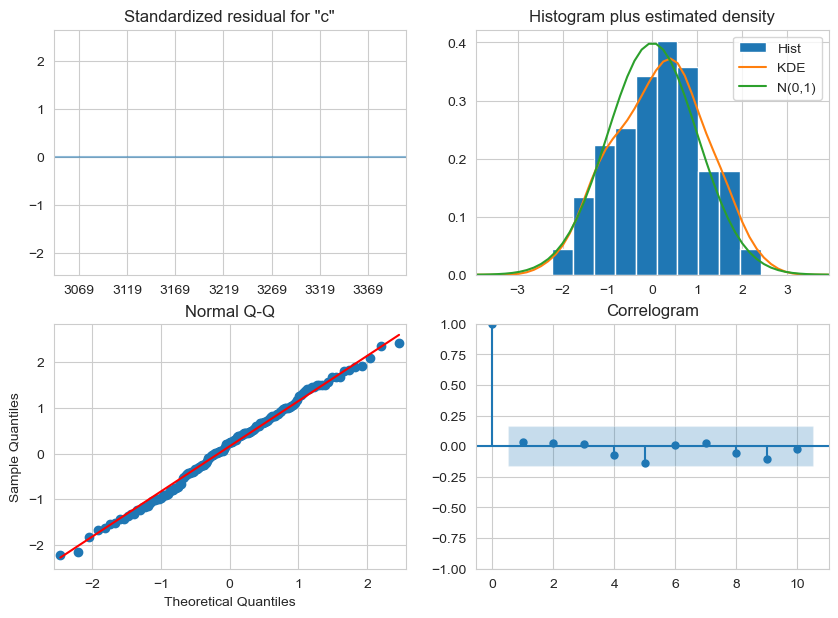

In [226]:
results.plot_diagnostics(figsize=(10, 7))
plt.show()

In [227]:
from  statsmodels.tsa.stattools import adfuller

result = adfuller(y3['count'].values[1:])
print("-- Before taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

diff = y3.diff()
result = adfuller(diff['count'].values[1:])
print("-- After taking the difference --")
print("ADF Statistic:", result[0])
print("p-value:", result[1])

-- Before taking the difference --
ADF Statistic: -2.1086940864323007
p-value: 0.24103306724458057
-- After taking the difference --
ADF Statistic: -6.589599205995354
p-value: 7.169835240724898e-09


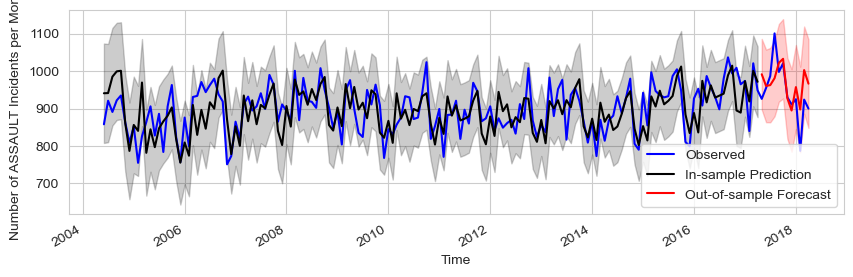

In [228]:
# neglect the beginning of the time series, where the model hasn't converged
pred = results.get_prediction(start = y3_train['2004-06':].index[0],  dynamic=False)
pred_ci = pred.conf_int() # 95% confidence interval 

forecast = results.get_forecast(steps=12) # forecast for the next 12 months
forecast_ci = forecast.conf_int() # 95% confidence interval 

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(y3['2004-06':].index, y3['2004-06':], label='Observed', color='b')

pred.predicted_mean.plot(ax=ax, label='In-sample Prediction', color='k')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

forecast.predicted_mean.plot(ax=ax, label='Out-of-sample Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='r', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('Number of ASSAULT Incidents per Month')
plt.legend()
plt.show()
